# Results notebook for AutoER paper

All tables and plots for the paper

In [1]:
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
palette = sns.color_palette("viridis")

FIGURES_DIR = "./figures/"
TABLES_DIR = "./sheets/"

# Datasets (D1-D10, DBPedia)

| Test | Dataset Specs            | #D1   | #D2   | #Duplicates |
|------|--------------------------|-------|-------|-------------|
| D1   | Restaurants1-Restaurants2| 340   | 2257  | 89          |
| D2   | Abt-Buy                  | 1077  | 1076  | 1076        |
| D3   | Amazon-Google Products   | 1355  | 3040  | 1103        |
| D4   | DBLP-ACM                 | 2617  | 2295  | 2225        |
| D5   | IMDB-TMDB                | 5119  | 6057  | 1969        |
| D6   | IMDB-TVDB                | 5119  | 7811  | 1073        |
| D7   | TMDB-TVDB                | 6057  | 7811  | 1096        |
| D8   | Walmart-Amazon           | 2555  | 22075 | 853         |
| D9   | DBLP-Google Scholar      | 2517  | 61354 | 2309        |
| D10  | IMDB-DBPedia             | 27616 | 23183 | 22864       |


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_specs = pd.read_csv('./data/dataset_specs.csv')
dataset_specs

,dataset,InputEntityProfiles,NumberOfAttributes,NumberOfDistinctValues,NumberOfNameValuePairs,AverageNVPairsPerEntity,AverageDistinctValuesPerEntity,AverageNVpairsPerAttribute,AverageDistinctValuesPerAttribute,NumberOfMissingNVpairs,AverageValueLength,AverageValueTokens,MaxValuesPerEntity
0,D1,2595,13,4273,8649,3.330000,1.650000,665.310000,328.690000,4.326000e+03,107.710000,20.590000,5
1,D2,2152,3,4383,4876,2.270000,2.040000,1625.330000,1461.000000,1.580000e+03,197.280000,39.850000,3
2,D3,4393,4,9674,14412,3.280000,2.200000,3603.000000,2418.500000,3.160000e+03,585.150000,103.270000,4
3,D4,4910,4,6592,19626,4.000000,1.340000,4906.500000,1648.000000,1.400000e+01,129.750000,23.010000,4
4,D5,11174,37,13624,45055,4.030000,1.220000,1217.700000,368.220000,1.784250e+05,81.200000,17.000000,20
5,D6,12928,18,12471,42196,3.260000,0.960000,2344.220000,692.830000,6.122800e+04,73.930000,14.620000,8
6,D7,13866,31,13834,44663,3.220000,1.000000,1440.740000,446.260000,2.326570e+05,100.660000,20.400000,20
7,D8,24628,6,62834,128458,5.220000,2.550000,21409.670000,10472.330000,1.931000e+04,102.340000,23.850000,6
8,D9,63869,4,129067,208065,3.260000,2.020000,52016.250000,32266.750000,4.741100e+04,108.150000,19.380000,4
9,D10,50797,10,424346,971445,19.120000,8.350000,97144.500000,42434.600000,6.540000e+07,283.020000,62.720000,1306


In [3]:
dbpedia_features = pd.read_csv('./data/dbpedia_features.csv')
dbpedia_features.loc[dbpedia_features['Dataset'] == 'dbpedia', 'Dataset'] = 'DBPEDIA'
dbpedia_features.rename(columns={'Dataset': 'dataset'}, inplace=True)
dbpedia_features

,dataset,InputEntityProfiles,NumberOfAttributes,NumberOfDistinctValues,NumberOfNameValuePairs,AverageNVPairsPerEntity,AverageDistinctValuesPerEntity,AverageNVpairsPerAttribute,AverageDistinctValuesPerAttribute,NumberOfMissingNVpairs,AverageValueLength,AverageValueTokens,MaxValuesPerEntity
0,DBPEDIA,3354773,57104,12070735,51918529,15.476018,3.598078,909.192508,211.381602,1.604093e+10,375.698749,79.390752,4797


In [4]:
all_features = pd.concat([dataset_specs, dbpedia_features], ignore_index=True)
all_features

,dataset,InputEntityProfiles,NumberOfAttributes,NumberOfDistinctValues,NumberOfNameValuePairs,AverageNVPairsPerEntity,AverageDistinctValuesPerEntity,AverageNVpairsPerAttribute,AverageDistinctValuesPerAttribute,NumberOfMissingNVpairs,AverageValueLength,AverageValueTokens,MaxValuesPerEntity
0,D1,2595,13,4273,8649,3.330000,1.650000,665.310000,328.690000,4.326000e+03,107.710000,20.590000,5
1,D2,2152,3,4383,4876,2.270000,2.040000,1625.330000,1461.000000,1.580000e+03,197.280000,39.850000,3
2,D3,4393,4,9674,14412,3.280000,2.200000,3603.000000,2418.500000,3.160000e+03,585.150000,103.270000,4
3,D4,4910,4,6592,19626,4.000000,1.340000,4906.500000,1648.000000,1.400000e+01,129.750000,23.010000,4
4,D5,11174,37,13624,45055,4.030000,1.220000,1217.700000,368.220000,1.784250e+05,81.200000,17.000000,20
5,D6,12928,18,12471,42196,3.260000,0.960000,2344.220000,692.830000,6.122800e+04,73.930000,14.620000,8
6,D7,13866,31,13834,44663,3.220000,1.000000,1440.740000,446.260000,2.326570e+05,100.660000,20.400000,20
7,D8,24628,6,62834,128458,5.220000,2.550000,21409.670000,10472.330000,1.931000e+04,102.340000,23.850000,6
8,D9,63869,4,129067,208065,3.260000,2.020000,52016.250000,32266.750000,4.741100e+04,108.150000,19.380000,4
9,D10,50797,10,424346,971445,19.120000,8.350000,97144.500000,42434.600000,6.540000e+07,283.020000,62.720000,1306


Per attribute values based on features extracted from the datasets

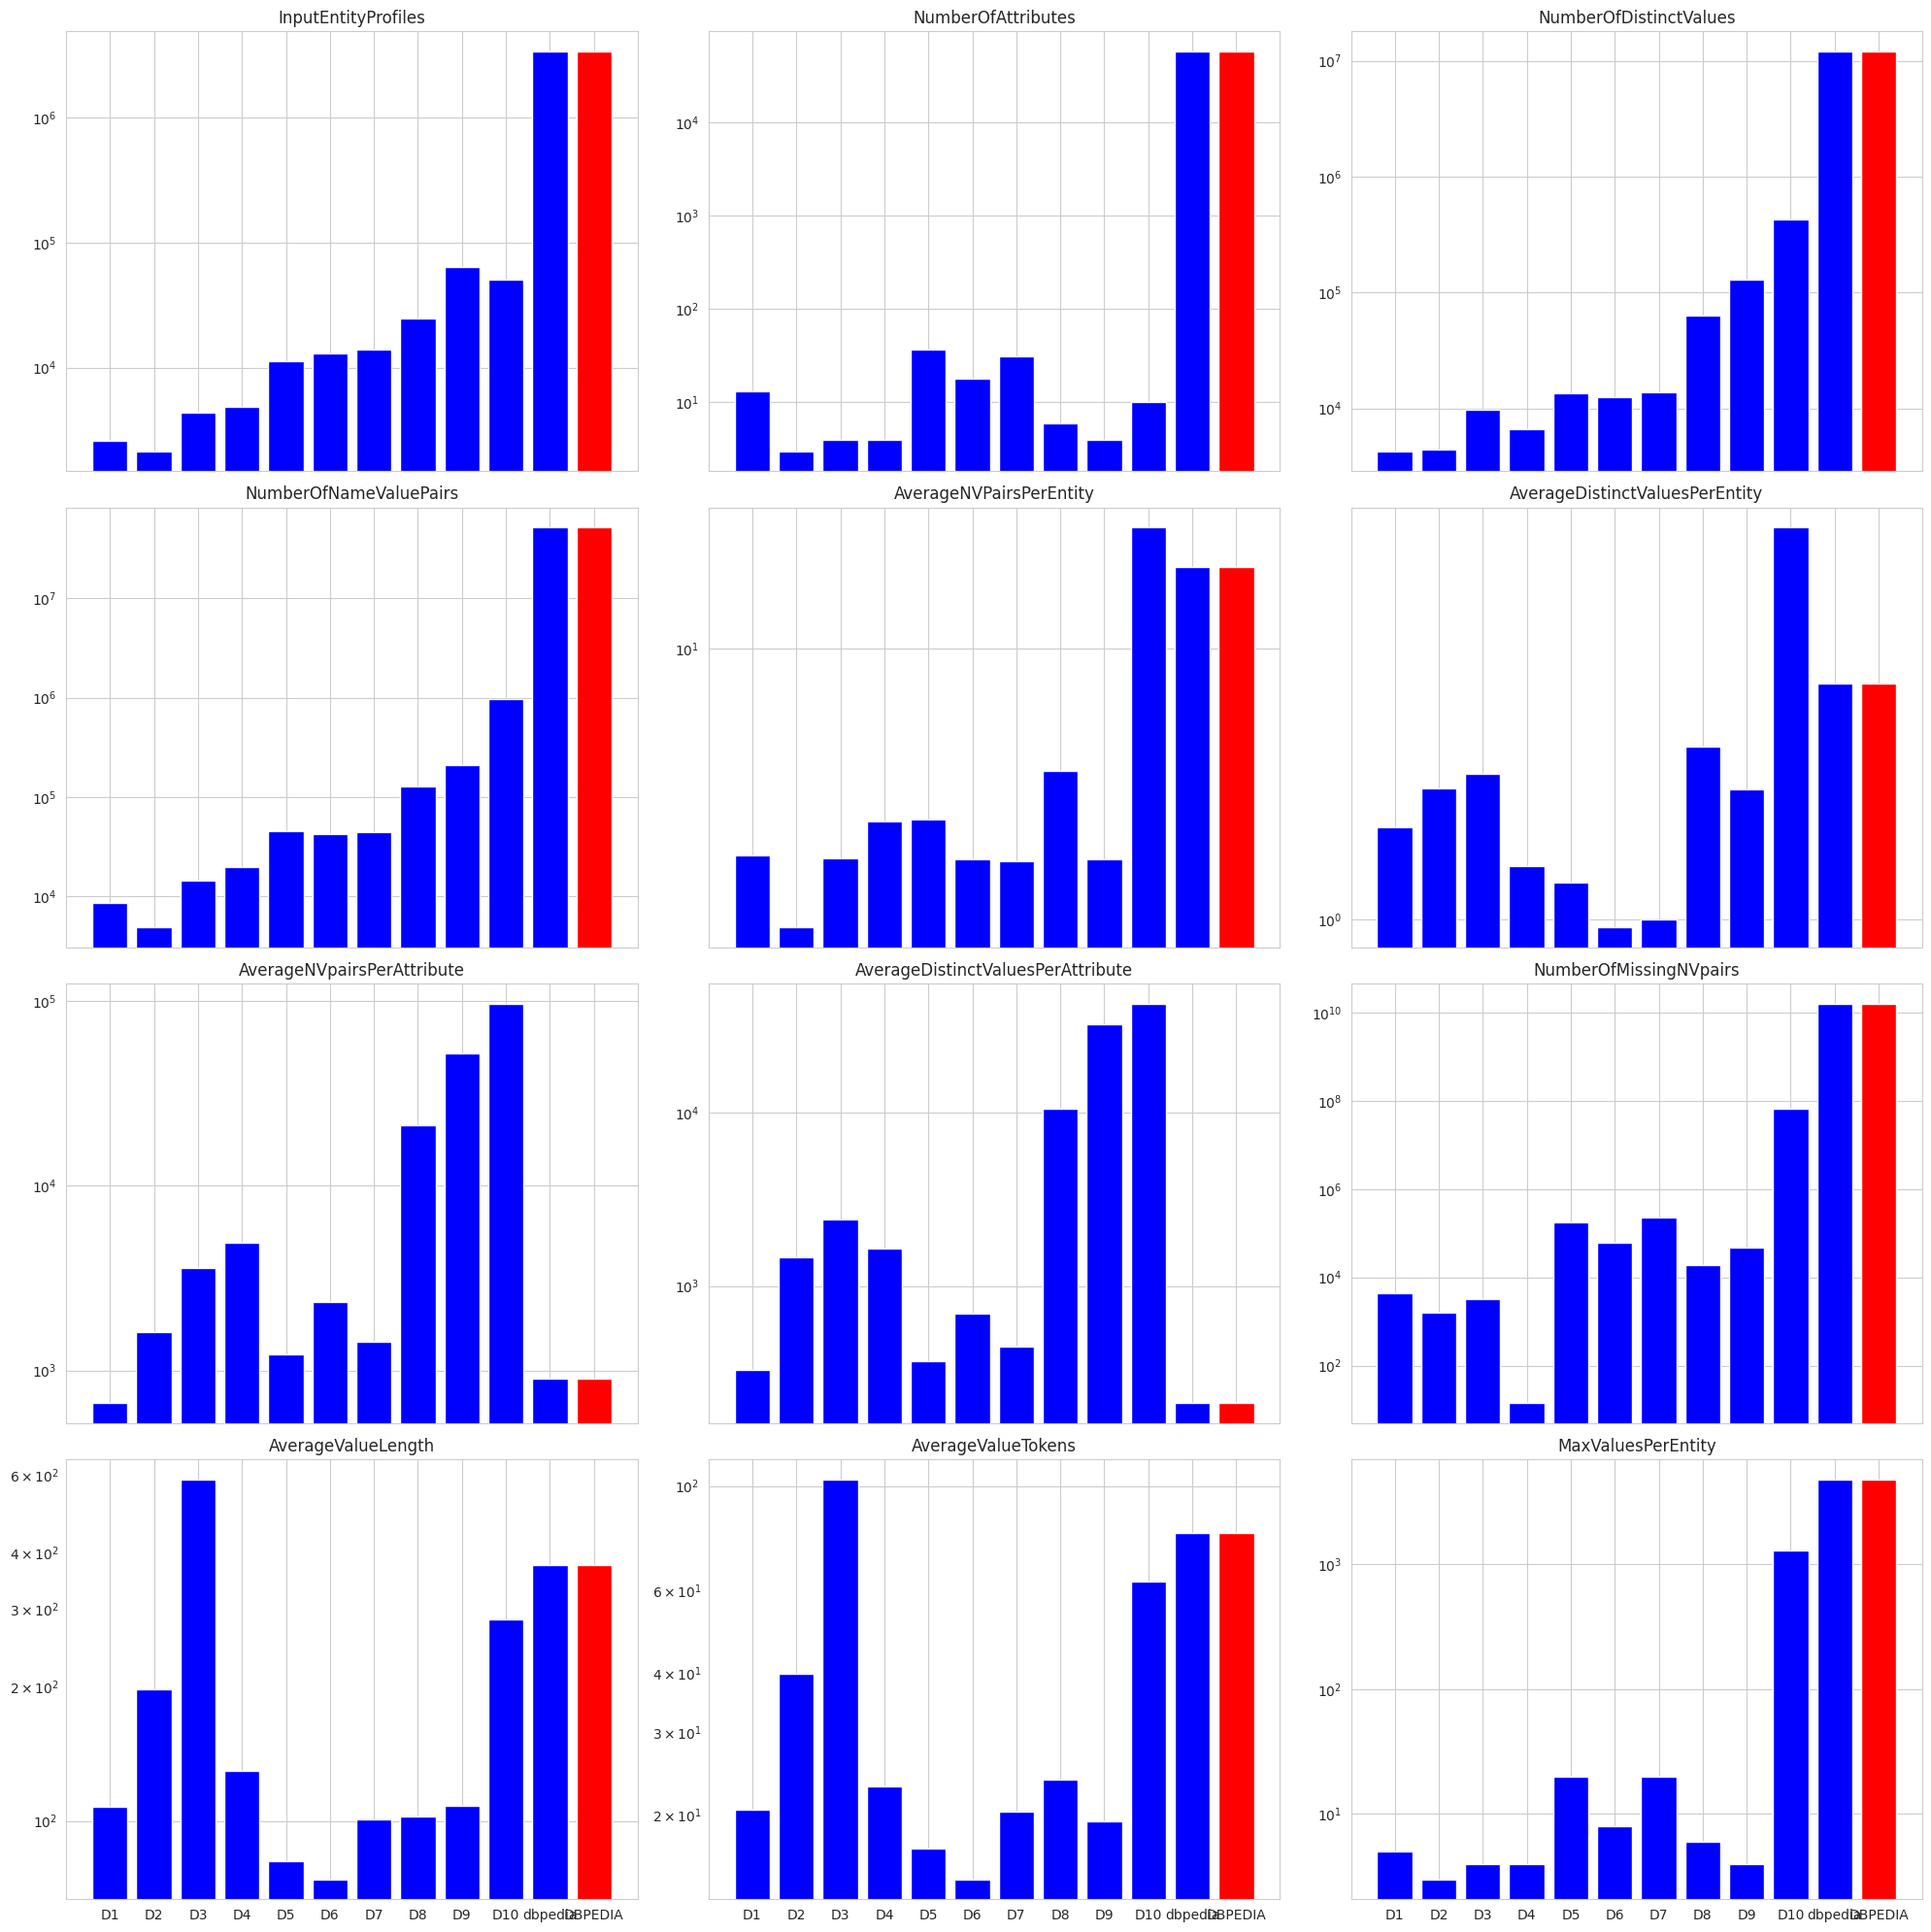

In [5]:
data=all_features

columns_to_plot = [
    'InputEntityProfiles', 'NumberOfAttributes', 'NumberOfDistinctValues',
    'NumberOfNameValuePairs', 'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity',
    'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute',
    'NumberOfMissingNVpairs', 'AverageValueLength', 'AverageValueTokens', 'MaxValuesPerEntity'
]
n_rows = 4
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), sharex=True)

axes = axes.flatten()

for ax, column in zip(axes, columns_to_plot):
    colors = ['red' if dataset == 'DBPEDIA' else 'blue' for dataset in data['dataset']]
    ax.set_yscale('log')
    ax.bar(data['dataset'], data[column], color=colors)
    ax.set_title(f'{column}')
    ax.set_xticks(range(len(data['dataset'])))
    ax.set_xticklabels(data['dataset'])

for ax in axes[len(columns_to_plot):]:
    fig.delaxes(ax)

plt.tight_layout()
# plt.savefig(FIGURES_DIR + 'dataset_specs.png')
plt.show()

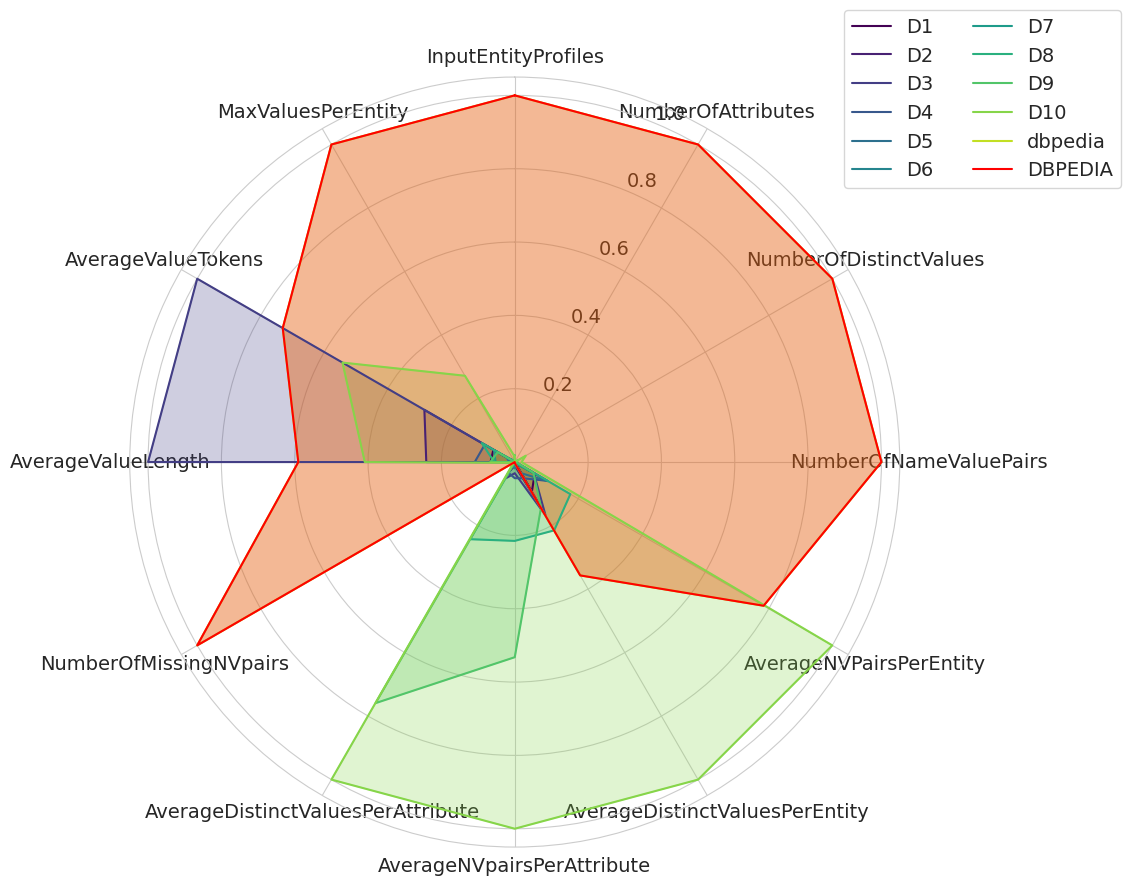

In [6]:
data=all_features

import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm

data_normalized = data.copy()
for column in columns_to_plot:
    data_normalized[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

def create_radar_chart(data, labels, title):
    num_vars = len(labels)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], labels)
    
    ax.set_rscale('linear')

    color_map = plt.get_cmap('viridis')
    colors = color_map(np.linspace(0, 1, len(data)))

    for idx, row in data.iterrows():
        values = row[columns_to_plot].tolist()
        values += values[:1]
        color = 'red' if row['dataset'] == 'DBPEDIA' else colors[idx % len(colors)]
        ax.plot(angles, values, label=row['dataset'], color=color)
        # increase font size
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.tick_params(axis='both', which='minor', labelsize=14)

        

        ax.fill(angles, values, color=color, alpha=0.25)
    
    # plt.title(title)
    plt.legend(loc='upper right', ncols=2, bbox_to_anchor=(1.3, 1.1), fontsize=14)
    plt.savefig(FIGURES_DIR + 'dataset_specs_radar.png', bbox_inches='tight')
    plt.show()

create_radar_chart(data_normalized, columns_to_plot, 'Comparison of Datasets')


## DBPEDIA dataset

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

dbpedia_features = pd.read_csv('./data/dbpedia_features.csv')
dbpedia_features

,Dataset,InputEntityProfiles,NumberOfAttributes,NumberOfDistinctValues,NumberOfNameValuePairs,AverageNVPairsPerEntity,AverageDistinctValuesPerEntity,AverageNVpairsPerAttribute,AverageDistinctValuesPerAttribute,NumberOfMissingNVpairs,AverageValueLength,AverageValueTokens,MaxValuesPerEntity
0,dbpedia,3354773,57104,12070735,51918529,15.476018,3.598078,909.192508,211.381602,1.604093e+10,375.698749,79.390752,4797


# **Problem 1:** Available ground truth


## Optuna Visualizations

Contains 4 databases:
- autoconf_gridsearch.db
- autoconf_random.db
- autoconf_tpe.db
- autoconf_qmc.db

In [8]:
import optuna
db_name = 'autoconf_qmc.db'
storage_name = f'sqlite:////home/konstantinos/pyJedAI-AutoConfiguration/with_gt/dbs/{db_name}'  # Replace with your storage name
study_summaries = optuna.study.get_all_study_summaries(storage=storage_name)
study_names = [summary.study_name for summary in study_summaries]
print(study_names)

/home/conda/miniconda3/envs/autoconf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['D2_5_16', 'D2_10_16', 'D2_15_16', 'D2_20_16', 'D2_25_16', 'D2_30_16', 'D2_35_16', 'D2_40_16', 'D2_45_16', 'D2_50_16', 'D2_55_16', 'D2_60_16', 'D2_65_16', 'D2_70_16', 'D2_75_16', 'D2_80_16', 'D2_85_16', 'D2_90_16', 'D2_95_16', 'D2_100_16', 'D2_5_64', 'D2_10_64', 'D2_15_64', 'D2_20_64', 'D2_25_64', 'D2_30_64', 'D2_35_64', 'D2_40_64', 'D2_45_64', 'D2_50_64', 'D2_55_64', 'D2_60_64', 'D2_65_64', 'D2_70_64', 'D2_75_64', 'D2_80_64', 'D2_85_64', 'D2_90_64', 'D2_95_64', 'D2_100_64', 'D2_5_256', 'D2_10_256', 'D2_15_256', 'D2_20_256', 'D2_25_256', 'D2_30_256', 'D2_35_256', 'D2_40_256', 'D2_45_256', 'D2_50_256', 'D2_55_256', 'D2_60_256', 'D2_65_256', 'D2_70_256', 'D2_75_256', 'D2_80_256', 'D2_85_256', 'D2_90_256', 'D2_95_256', 'D2_100_256', 'D2_5_1024', 'D2_10_1024', 'D2_15_1024', 'D2_20_1024', 'D2_25_1024', 'D2_30_1024', 'D2_35_1024', 'D1_5_16', 'D1_10_16', 'D1_15_16', 'D2_40_1024', 'D1_20_16', 'D2_45_1024', 'D1_25_16', 'D1_30_16', 'D2_50_1024', 'D1_35_16', 'D2_55_1024', 'D1_40_16', 'D2_60_1024

In [9]:
# db_name = 'autoconf_gridsearch.db'
# storage_name = f'sqlite:////home/konstantinos/pyJedAI-AutoConfiguration/with_gt/dbs/{db_name}'  # Replace with your storage name
# study_summaries = optuna.study.get_all_study_summaries(storage=storage_name)
# study_names = [summary.study_name for summary in study_summaries]
# print(study_names)

In [10]:
study_name = study_names[0]
study = optuna.load_study(study_name=study_name, storage=storage_name)

df = study.trials_dataframe()
df

,number,value,datetime_start,datetime_complete,duration,params_clustering,params_k,params_lm,params_threshold,state
0,0,39.2279,2024-08-02 22:35:52.578990,2024-08-02 22:35:53.194878,0 days 00:00:00.615888,KiralyMSMApproximateClustering,17,word2vec,0.120193,COMPLETE
1,1,64.2683,2024-08-02 22:35:53.213376,2024-08-02 22:35:53.455042,0 days 00:00:00.241666,ConnectedComponentsClustering,1,smpnet,0.050000,COMPLETE
2,2,41.0602,2024-08-02 22:35:53.468616,2024-08-02 22:35:54.324064,0 days 00:00:00.855448,UniqueMappingClustering,51,word2vec,0.500000,COMPLETE
3,3,0.0000,2024-08-02 22:35:54.338363,2024-08-02 22:35:55.149699,0 days 00:00:00.811336,ConnectedComponentsClustering,75,fasttext,0.275000,COMPLETE
4,4,37.9910,2024-08-02 22:35:55.174902,2024-08-02 22:35:55.565136,0 days 00:00:00.390234,KiralyMSMApproximateClustering,25,word2vec,0.725000,COMPLETE


In [11]:
import plotly.graph_objects as go
custom_layout = go.Layout(
    font=dict(family="Arial, sans-serif", size=12, color="#4d4d4d"),
    title=dict(font=dict(size=20, color='#333')),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridcolor='#ebebeb',
        gridwidth=1,
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='#ebebeb'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='#ebebeb',
        gridwidth=1,
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='#ebebeb'
    )
)

In [12]:
# fig = optuna.visualization.plot_optimization_history(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"optimization_history.png", width=1200, height=800)
# fig.show()

In [13]:
# fig = optuna.visualization.plot_parallel_coordinate(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"plot_parallel_coordinate.png")
# fig.show()

In [14]:
# fig = optuna.visualization.plot_contour(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"plot_contour.png")
# fig.show()

In [15]:
# fig = optuna.visualization.plot_param_importances(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"plot_param_importances.png", width=1200, height=800)
# fig.show()

In [16]:
# fig = optuna.visualization.plot_edf(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"plot_edf.png", width=1200, height=800)
# fig.show()

## All trials logs (All samplers + all seeds + gridsearch concatenated)

In [17]:
all_trials_raw = pd.read_csv('./data/trials.csv')
all_trials_raw

,trial,dataset,clustering,lm,k,threshold,sampler,seed,precision,recall,f1,runtime
0,0,D4,KiralyMSMApproximateClustering,word2vec,17,0.120193,qmc,16,98.4330,93.2104,95.7506,0.855900
1,1,D4,ConnectedComponentsClustering,smpnet,1,0.050000,qmc,16,99.4747,93.6601,96.4799,0.426300
2,2,D4,UniqueMappingClustering,word2vec,51,0.500000,qmc,16,94.2807,96.3579,95.3080,2.291400
3,3,D4,ConnectedComponentsClustering,fasttext,75,0.275000,qmc,16,0.0000,0.0000,0.0000,1.908300
4,4,D4,KiralyMSMApproximateClustering,word2vec,25,0.725000,qmc,16,98.5053,91.8615,95.0675,0.907000
...,...,...,...,...,...,...,...,...,...,...,...,...
608995,39895,D5,KiralyMSMApproximateClustering,word2vec,72,0.500000,gridsearch,42,51.1098,45.6301,48.2148,9.313238
608996,39896,D5,KiralyMSMApproximateClustering,word2vec,72,0.600000,gridsearch,42,53.1775,45.0711,48.7899,8.498901
608997,39897,D5,KiralyMSMApproximateClustering,word2vec,88,0.250000,gridsearch,42,48.5111,45.5285,46.9725,10.238626
608998,39898,D5,KiralyMSMApproximateClustering,word2vec,18,0.050000,gridsearch,42,48.8134,45.9858,47.3574,7.129898


In [18]:
all_trials= all_trials_raw

In [19]:
# all_trials = all_trials_raw[all_trials_raw['f1']!=0]
# all_trials['f1'] = all_trials['f1'].round(4)
# all_trials['threshold'] = all_trials['threshold'].round(4)
# all_trials.drop_duplicates(inplace=True)

# # all_trials.shape
# all_trials.to_csv('./data/trials_processed.csv')

In [20]:
all_trials.sample(5)

,trial,dataset,clustering,lm,k,threshold,sampler,seed,precision,recall,f1,runtime
373713,4113,D10,ConnectedComponentsClustering,smpnet,10,0.550000,gridsearch,42,92.3415,8.2798,15.1969,19.924984
251742,1842,D1,KiralyMSMApproximateClustering,st5,59,0.250000,gridsearch,42,37.6068,98.8764,54.4892,1.402730
534324,5124,D6,KiralyMSMApproximateClustering,fasttext,54,0.950000,gridsearch,42,28.0072,14.5522,19.1529,1.708261
189663,63,D3,KiralyMSMApproximateClustering,sminilm,100,0.654459,gps,16,58.9325,49.0481,53.5379,5.455400
93334,79,D7,UniqueMappingClustering,smpnet,93,0.777374,tpe,1024,57.6667,78.9954,66.6667,6.864200


#### Grid-search best F1s

In [21]:
gridsearch_trials = all_trials[all_trials['sampler'] == 'gridsearch']
gb_f1 = gridsearch_trials.groupby(['dataset']).agg({'f1': ['max']}).reset_index()
gb_f1.columns = ['dataset', 'f1_max']
# rename columns
gb_f1.rename(columns={'f1_max': 'GB-F1'}, inplace=True)

gb_f1

,dataset,GB-F1
0,D1,75.5319
1,D10,56.1170
2,D2,85.8486
3,D3,59.1887
4,D4,98.6011
5,D5,78.7255
6,D6,60.2534
7,D7,67.3557
8,D8,47.5550
9,D9,94.8861


In [22]:
gridsearch_trials

,trial,dataset,clustering,lm,k,threshold,sampler,seed,precision,recall,f1,runtime
210000,0,D4,KiralyMSMApproximateClustering,fasttext,97,0.85,gridsearch,42,93.4543,76.3939,84.0673,2.888602
210001,1,D4,UniqueMappingClustering,fasttext,43,0.60,gridsearch,42,82.6409,75.1349,78.7094,1.117376
210002,2,D4,KiralyMSMApproximateClustering,fasttext,31,0.30,gridsearch,42,92.7528,74.2356,82.4675,0.921575
210003,3,D4,ConnectedComponentsClustering,fasttext,83,0.90,gridsearch,42,100.0000,2.8327,5.5094,1.067627
210004,4,D4,KiralyMSMApproximateClustering,fasttext,45,0.95,gridsearch,42,98.3845,54.7662,70.3640,0.580548
...,...,...,...,...,...,...,...,...,...,...,...,...
608995,39895,D5,KiralyMSMApproximateClustering,word2vec,72,0.50,gridsearch,42,51.1098,45.6301,48.2148,9.313238
608996,39896,D5,KiralyMSMApproximateClustering,word2vec,72,0.60,gridsearch,42,53.1775,45.0711,48.7899,8.498901
608997,39897,D5,KiralyMSMApproximateClustering,word2vec,88,0.25,gridsearch,42,48.5111,45.5285,46.9725,10.238626
608998,39898,D5,KiralyMSMApproximateClustering,word2vec,18,0.05,gridsearch,42,48.8134,45.9858,47.3574,7.129898


Grid-search runtimes

In [23]:
# gridsearch_trials = all_trials[all_trials['sampler'] == 'gridsearch']
gb_runtime = gridsearch_trials.groupby(['dataset']).agg({'runtime': ['sum']}).reset_index()
gb_runtime.columns = ['dataset', 'runtime_sum']
gb_runtime

,dataset,runtime_sum
0,D1,1.492993e+05
1,D10,1.152362e+06
2,D2,1.392968e+05
3,D3,1.645690e+05
4,D4,1.643777e+05
5,D5,2.186331e+05
6,D6,2.556517e+05
7,D7,2.691919e+05
8,D8,5.253461e+05
9,D9,1.185349e+06


In [24]:
all_trials.describe()

,trial,k,threshold,seed,precision,recall,f1,runtime
count,609000.000000,609000.000000,609000.000000,609000.000000,609000.000000,609000.000000,609000.000000,609000.000000
mean,13081.971264,50.059200,0.499364,403.793103,49.606539,44.161768,39.010391,9.557645
std,13286.466185,30.521841,0.274040,1035.516027,32.822538,34.683452,30.125704,14.459217
min,0.000000,1.000000,0.050000,16.000000,0.000000,0.000000,0.000000,0.052400
25%,48.000000,23.000000,0.250000,42.000000,24.154250,7.835800,11.409000,2.486500
50%,9449.500000,50.000000,0.500000,42.000000,48.704900,45.376000,37.968600,4.665258
75%,24674.250000,77.000000,0.750000,64.000000,80.769200,73.880600,58.306200,9.129200
max,39899.000000,100.000000,0.950000,4096.000000,100.000000,98.876400,98.601100,281.495167


How many trials per approach?

RandomSampler [optuna]:  52500
QMCSampler [optuna]:  52500
TPESampler [optuna]:  52500
GPSampler [optuna]:  52500
Gridsearch [gridsearch]:  399000
All [all]:  609000
Dropped duplicates:  0


/tmp/ipykernel_1442843/659302128.py:35: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "^". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.
  wedge.set_hatch(hatch)
/tmp/ipykernel_1442843/659302128.py:38: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "^". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.
  patches = [mpatches.Patch(edgecolor='black', facecolor=colors[i], hatch=hatches[i], label=sampler_labels[i]) for i in range(len(sampler_labels))]


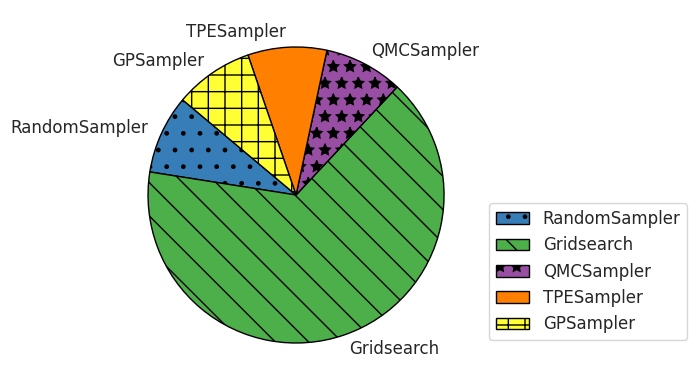

In [25]:
trial_counts = all_trials.groupby('sampler')['trial'].count()

print('RandomSampler [optuna]: ', trial_counts['random'])
print('QMCSampler [optuna]: ', trial_counts['qmc'])
print('TPESampler [optuna]: ', trial_counts['tpe'])
print('GPSampler [optuna]: ', trial_counts['gps'])
print('Gridsearch [gridsearch]: ', trial_counts['gridsearch'])
print('All [all]: ', all_trials.shape[0])
print('Dropped duplicates: ', all_trials_raw.shape[0] - all_trials.shape[0])

import matplotlib.patches as mpatches

# Assuming trial_counts is a pandas Series and has been calculated as shown in your initial code
# sampler_counts = trial_counts.values  # This should represent the count values for each sampler
sampler_labels = ['RandomSampler', 'Gridsearch', 'QMCSampler', 'TPESampler', 'GPSampler']
sampler_counts = trial_counts.values  # Assuming 'trial_counts' is a pandas Series

# Colors and patterns for colorblind-friendly visualization
colors = ['#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
hatches = ['.', '\\', '*', '^', '+']

# Creating a pie chart with patterns for colorblind accessibility
plt.figure(figsize=(6, 4))
wedges, texts = plt.pie(
    sampler_counts, 
    labels=sampler_labels, 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(linewidth=1, edgecolor='black'),
    textprops={'fontsize': 12}  # Increase font size for labels
)

# Adding hatches (patterns) to each wedge for colorblind-friendly design
for wedge, hatch in zip(wedges, hatches):
    wedge.set_hatch(hatch)

# Adding a legend with patterns and increasing font size
patches = [mpatches.Patch(edgecolor='black', facecolor=colors[i], hatch=hatches[i], label=sampler_labels[i]) for i in range(len(sampler_labels))]
plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Increase font size for labels
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

# Save and show plot
plt.savefig(FIGURES_DIR + 'sampler_distribution.png', bbox_inches='tight')
plt.tight_layout()  # Adjust layout to make room for the legend and title
plt.show()

## Convergence diagrams

In [166]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapezoid

import seaborn as sns

sns.set_style("whitegrid")

suffix = './with_gt/results/'
dirs = ['qmc', 'tpe', 'random', 'gps']
methods = [ 'RandomSampler','TPESampler', 'QMCSampler',  'GPSampler']
palette = {
    'QMCSampler': 'blue',
    'TPESampler': 'green',
    'RandomSampler': 'red',
    'GPSampler': 'orange'
}
data = {f'D{i}': {method: None for method in methods} for i in range(1, 11)}

for method, directory in zip(methods, dirs):
    for i in range(1, 11):
        batches = [i for i in range(5, 100 + 5, 5)]
        print(f'{suffix}{directory}/D{i}.csv')
        df = pd.read_csv(f'{suffix}{directory}/D{i}.csv')
        df['initial_index'] = df.index
        max_trials = []
        seed = df['seed'].iloc[0]
        sampler = df['sampler'].iloc[0]
        for row in df.iterrows():
            row = row[1]
            prev_seed = seed
            prev_sampler = sampler
            seed = row['seed']
            sampler =  row['sampler']
            if seed != prev_seed or sampler != prev_sampler:
                batches = [i for i in range(5, 100 + 5, 5)]
            trials_id = row['trial']
            max_trials.append(batches[0])
            if trials_id == batches[0] - 1:
                batches.pop(0)
        df['max_trials'] = max_trials
        data[f'D{i}'][method] = df.sort_values(by=['initial_index'])

./with_gt/results/qmc/D1.csv
./with_gt/results/qmc/D2.csv
./with_gt/results/qmc/D3.csv
./with_gt/results/qmc/D4.csv
./with_gt/results/qmc/D5.csv
./with_gt/results/qmc/D6.csv
./with_gt/results/qmc/D7.csv
./with_gt/results/qmc/D8.csv
./with_gt/results/qmc/D9.csv
./with_gt/results/qmc/D10.csv
./with_gt/results/tpe/D1.csv
./with_gt/results/tpe/D2.csv
./with_gt/results/tpe/D3.csv
./with_gt/results/tpe/D4.csv
./with_gt/results/tpe/D5.csv
./with_gt/results/tpe/D6.csv
./with_gt/results/tpe/D7.csv
./with_gt/results/tpe/D8.csv
./with_gt/results/tpe/D9.csv
./with_gt/results/tpe/D10.csv
./with_gt/results/random/D1.csv
./with_gt/results/random/D2.csv
./with_gt/results/random/D3.csv
./with_gt/results/random/D4.csv
./with_gt/results/random/D5.csv
./with_gt/results/random/D6.csv
./with_gt/results/random/D7.csv
./with_gt/results/random/D8.csv
./with_gt/results/random/D9.csv
./with_gt/results/random/D10.csv
./with_gt/results/gps/D1.csv
./with_gt/results/gps/D2.csv
./with_gt/results/gps/D3.csv
./with_gt/

#### Heatmaps

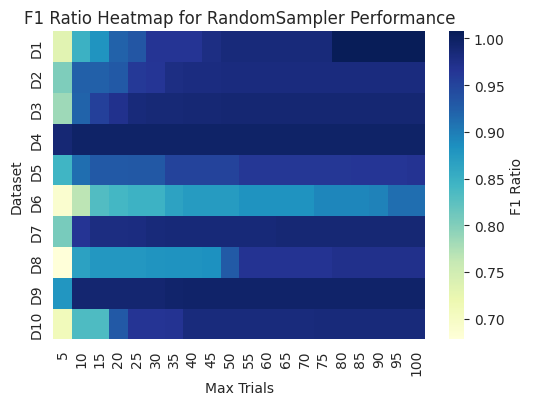

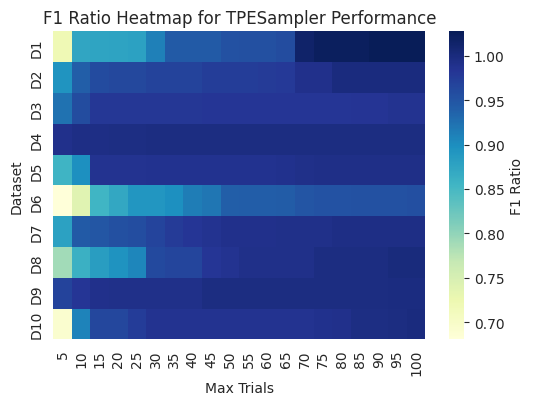

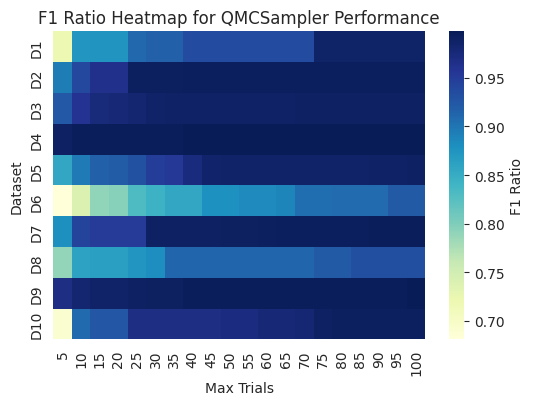

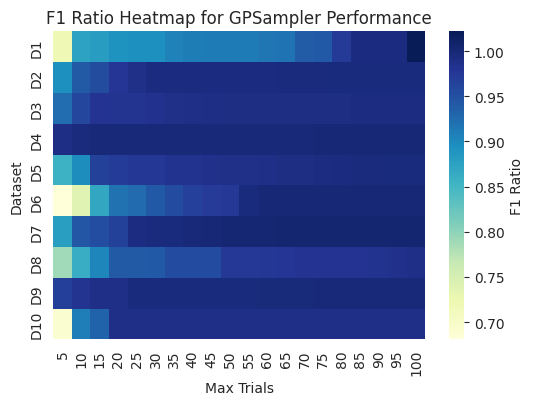

In [167]:
for i, sampler in enumerate(methods):
    heatmap_data = []

    for dataset, values in data.items():
        max_f1_per_seed_trial = values[sampler].groupby(['max_trials', 'seed'])['f1'].max().reset_index()
        avg_max_f1_per_trial = max_f1_per_seed_trial.groupby('max_trials')['f1'].mean().reset_index()
        
        gb_f1_value = gb_f1[gb_f1['dataset'] == dataset]['GB-F1'].values[0]
        avg_max_f1_per_trial['f1_ratio'] = avg_max_f1_per_trial['f1'] / gb_f1_value
        for _, row in avg_max_f1_per_trial.iterrows():
            heatmap_data.append([dataset, row['max_trials'], row['f1_ratio']])
    heatmap_df = pd.DataFrame(heatmap_data, columns=['Dataset', 'Max Trials', 'F1 Ratio'])

    heatmap_df['Dataset'] = pd.Categorical(heatmap_df['Dataset'], categories=[f'D{i}' for i in range(1, 11)], ordered=True)

    heatmap_df['Max Trials'] = heatmap_df['Max Trials'].astype(int)

    heatmap_pivot = heatmap_df.pivot(index='Dataset', columns='Max Trials', values='F1 Ratio')

    plt.figure(figsize=(6, 4))
    sns.heatmap(heatmap_pivot, annot=False, cmap="YlGnBu", cbar_kws={'label': 'F1 Ratio'})
    plt.title(f'F1 Ratio Heatmap for {sampler} Performance')
    plt.xlabel('Max Trials')
    plt.ylabel('Dataset')
    plt.show()

           Sampler Dataset  Max Trials  Avg. Runtime
0    RandomSampler      D1           5       3.85480
1    RandomSampler      D1          10      10.03412
2    RandomSampler      D1          15      18.01564
3    RandomSampler      D1          20      21.91768
4    RandomSampler      D1          25      25.57774
..             ...     ...         ...           ...
195  RandomSampler     D10          80    1431.39492
196  RandomSampler     D10          85    1505.78966
197  RandomSampler     D10          90    1597.24468
198  RandomSampler     D10          95    1696.23456
199  RandomSampler     D10         100    1770.29952

[200 rows x 4 columns]


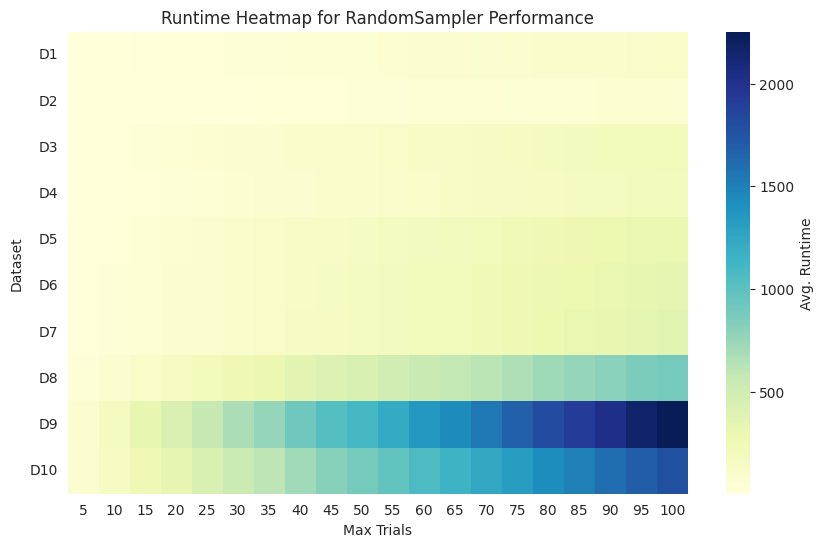

        Sampler Dataset  Max Trials  Avg. Runtime
0    TPESampler      D1           5       3.53350
1    TPESampler      D1          10       8.39400
2    TPESampler      D1          15      12.46112
3    TPESampler      D1          20      15.99420
4    TPESampler      D1          25      19.53752
..          ...     ...         ...           ...
195  TPESampler     D10          80    1942.34752
196  TPESampler     D10          85    2046.61002
197  TPESampler     D10          90    2128.96232
198  TPESampler     D10          95    2220.58106
199  TPESampler     D10         100    2291.61612

[200 rows x 4 columns]


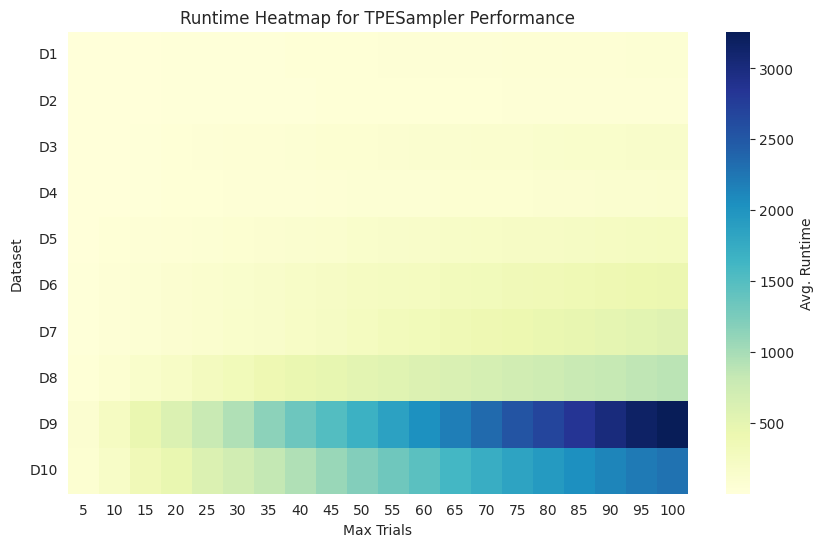

        Sampler Dataset  Max Trials  Avg. Runtime
0    QMCSampler      D1           5       3.81494
1    QMCSampler      D1          10       8.97534
2    QMCSampler      D1          15      13.72098
3    QMCSampler      D1          20      18.05328
4    QMCSampler      D1          25      22.98670
..          ...     ...         ...           ...
195  QMCSampler     D10          80    1497.20192
196  QMCSampler     D10          85    1599.07590
197  QMCSampler     D10          90    1681.40134
198  QMCSampler     D10          95    1771.98702
199  QMCSampler     D10         100    1859.23744

[200 rows x 4 columns]


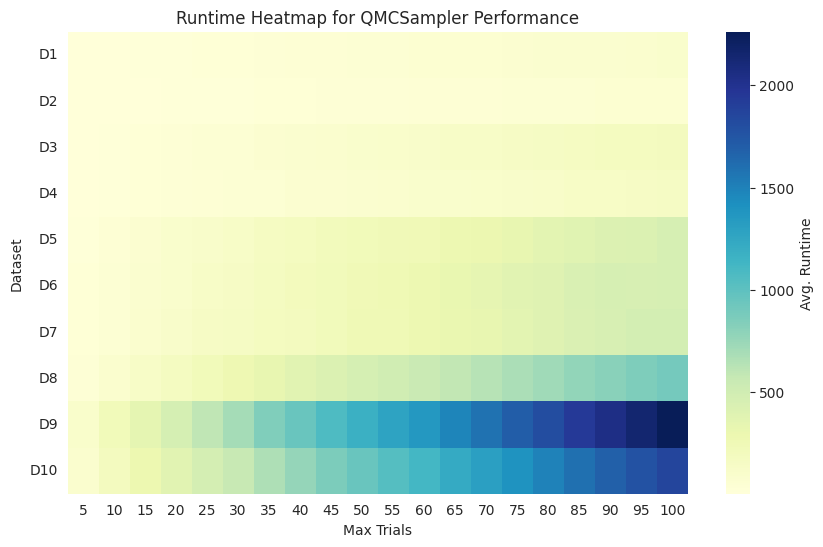

       Sampler Dataset  Max Trials  Avg. Runtime
0    GPSampler      D1           5       4.98810
1    GPSampler      D1          10      12.66424
2    GPSampler      D1          15      25.55412
3    GPSampler      D1          20      41.17648
4    GPSampler      D1          25      64.32254
..         ...     ...         ...           ...
195  GPSampler     D10          80    1525.01034
196  GPSampler     D10          85    1601.40400
197  GPSampler     D10          90    1690.32018
198  GPSampler     D10          95    1764.26454
199  GPSampler     D10         100    1866.21602

[200 rows x 4 columns]


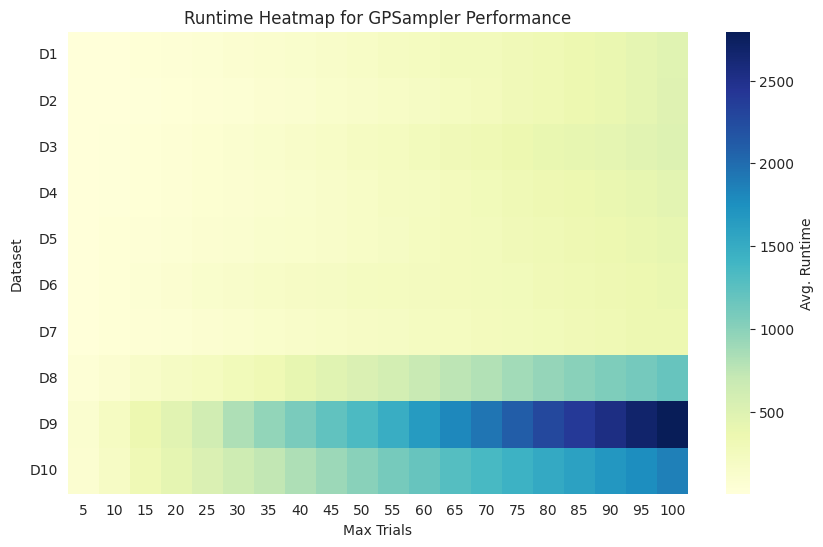

In [168]:
for i, sampler in enumerate(methods):
    heatmap_data = []

    for dataset, values in data.items():
        sum_runtime_per_trial = values[sampler].groupby(['max_trials', 'seed'])['runtime'].sum().reset_index()
        avg_runtime_per_max_trials = sum_runtime_per_trial.groupby('max_trials')['runtime'].mean().reset_index()
        avg_runtime_per_max_trials.columns = ['max_trials', 'avg_runtime']
        for _, row in avg_runtime_per_max_trials.iterrows():
            heatmap_data.append([sampler, dataset, row['max_trials'], row['avg_runtime']])
    heatmap_df = pd.DataFrame(heatmap_data, columns=['Sampler', 'Dataset', 'Max Trials', 'Avg. Runtime'])

    heatmap_df['Dataset'] = pd.Categorical(heatmap_df['Dataset'], categories=[f'D{i}' for i in range(1, 11)], ordered=True)

    heatmap_df['Max Trials'] = heatmap_df['Max Trials'].astype(int)

    print(heatmap_df)

    heatmap_pivot = heatmap_df.pivot(index='Dataset', columns='Max Trials', values='Avg. Runtime')

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_pivot, annot=False, cmap="YlGnBu", cbar_kws={'label': 'Avg. Runtime'})
    plt.title(f'Runtime Heatmap for {sampler} Performance')
    plt.xlabel('Max Trials')
    plt.ylabel('Dataset')
    plt.yticks(rotation=0)
    plt.show()

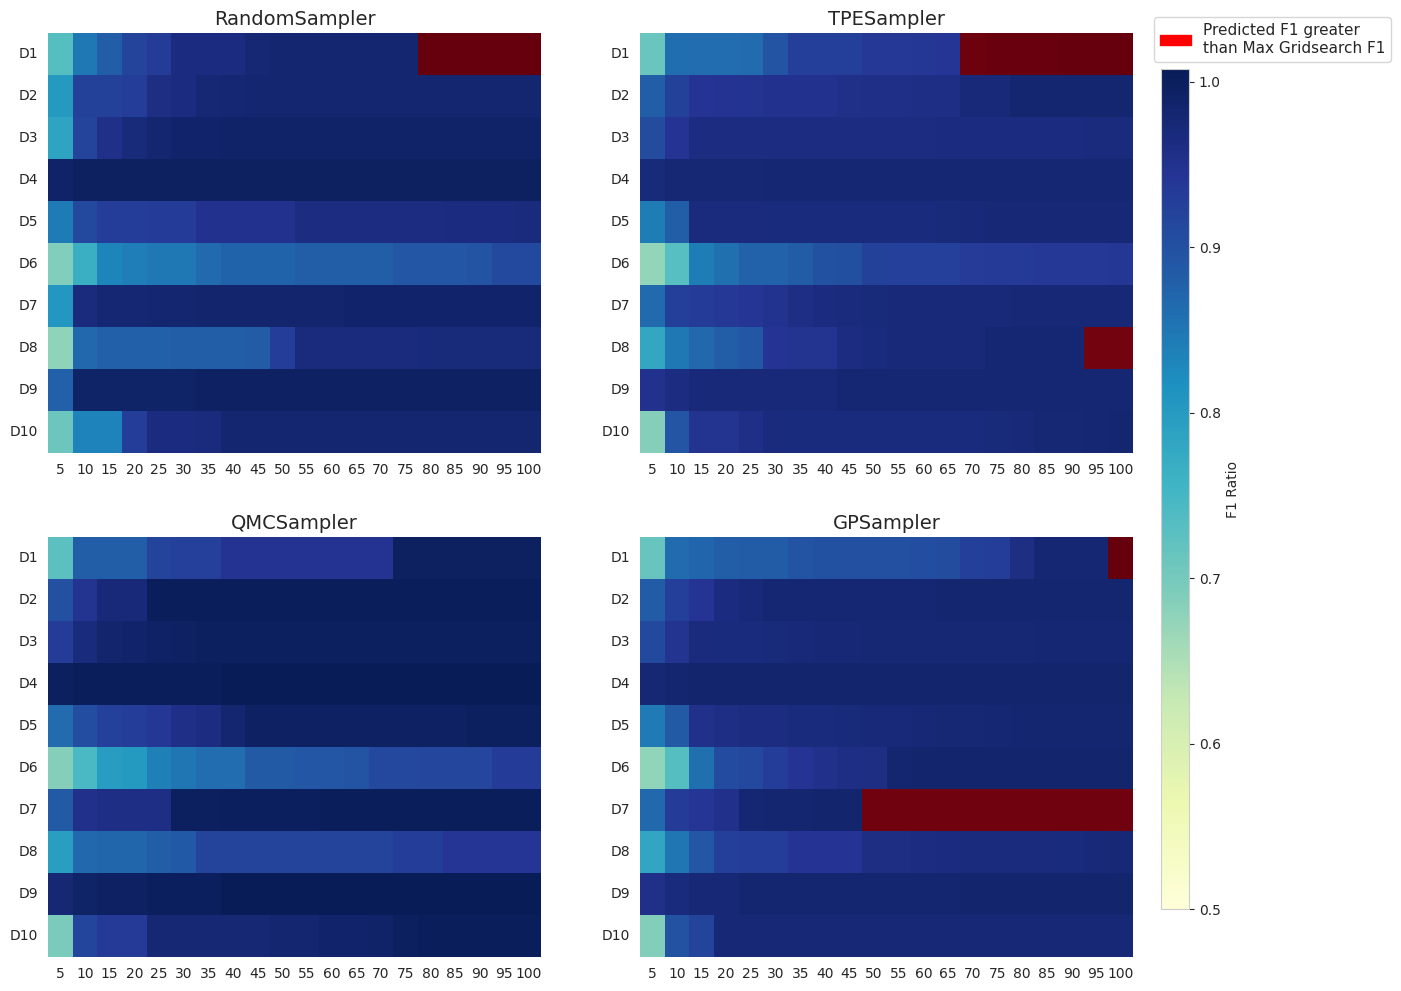

In [169]:
import matplotlib.colors as mcolors

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

axes = axes.flatten()

heatmap_plots = []
cmap = sns.color_palette("YlGnBu", as_cmap=True)
cmap = mcolors.ListedColormap(cmap(np.linspace(0, 1, 256)))

for i, sampler in enumerate(methods):
    heatmap_data = []

    for dataset, values in data.items():

        max_f1_per_seed_trial = values[sampler].groupby(['max_trials', 'seed'])['f1'].max().reset_index()
        # print(max_f1_per_seed_trial)
        avg_max_f1_per_trial = max_f1_per_seed_trial.groupby('max_trials')['f1'].mean().reset_index()

        gb_f1_value = gb_f1[gb_f1['dataset'] == dataset]['GB-F1'].values[0]

        avg_max_f1_per_trial['f1_ratio'] = avg_max_f1_per_trial['f1'] / gb_f1_value

        avg_max_f1_per_trial.to_csv(f'./with_gt/results/convergence/avg_max_f1_per_trial/{sampler}_{dataset}.csv', index=False)

        for _, row in avg_max_f1_per_trial.iterrows():
            heatmap_data.append([dataset, row['max_trials'], row['f1_ratio']])

    heatmap_df = pd.DataFrame(heatmap_data, columns=['Dataset', 'Max Trials', 'F1 Ratio'])

    heatmap_df['Dataset'] = pd.Categorical(heatmap_df['Dataset'], categories=[f'D{i}' for i in range(10, 0, -1)], ordered=True)
    heatmap_df['Max Trials'] = heatmap_df['Max Trials'].astype(int)
    
    heatmap_df.to_csv(f'./with_gt/results/convergence/{sampler}_convergence.csv')

    heatmap_pivot = heatmap_df.pivot(index='Dataset', columns='Max Trials', values='F1 Ratio')

    heatmap_pivot.sort_index(axis=0, ascending=False, inplace=True)
    mask = heatmap_pivot > 1.0

    ax = sns.heatmap(heatmap_pivot, annot=False, cmap=cmap, cbar=False, ax=axes[i], mask=mask, vmin=0.5, vmax=heatmap_pivot.max().max())
    sns.heatmap(heatmap_pivot, annot=False, cmap="Reds", cbar=False, ax=axes[i], mask=~mask, vmin=0.0)
    ax.set_facecolor('red')

    axes[i].set_title(f'{sampler}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    heatmap_plots.append(ax)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
plt.colorbar(heatmap_plots[0].collections[0], cax=cbar_ax, label='F1 Ratio')

red_patch = mpatches.Patch(color='red', label='Predicted F1 greater\nthan Max Gridsearch F1')

plt.legend(handles=[red_patch], loc='lower right', bbox_to_anchor=(8.5, 1.0), fontsize=11)
plt.savefig(FIGURES_DIR + 'sampler_heatmaps.png', bbox_inches='tight')
plt.show()


In [170]:
gb_f1

,dataset,GB-F1
0,D1,75.5319
1,D10,56.1170
2,D2,85.8486
3,D3,59.1887
4,D4,98.6011
5,D5,78.7255
6,D6,60.2534
7,D7,67.3557
8,D8,47.5550
9,D9,94.8861


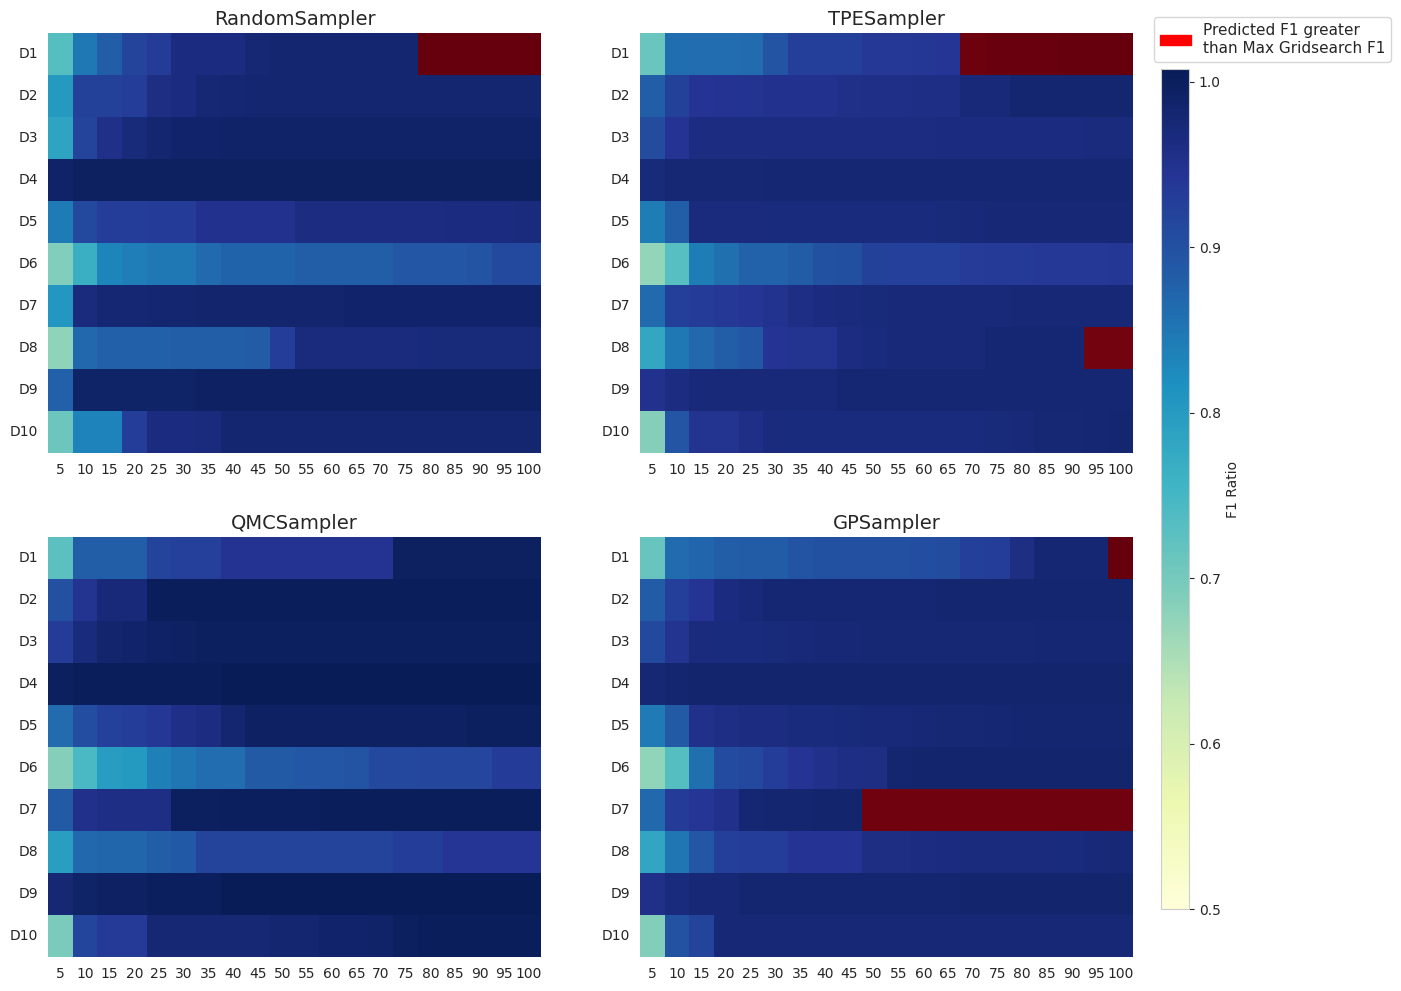

In [171]:
import matplotlib.colors as mcolors

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

axes = axes.flatten()

heatmap_plots = []
cmap = sns.color_palette("YlGnBu", as_cmap=True)
cmap = mcolors.ListedColormap(cmap(np.linspace(0, 1, 256)))

for i, sampler in enumerate(methods):
    heatmap_data = []

    for dataset, values in data.items():

        max_f1_per_seed_trial = values[sampler].groupby(['max_trials', 'seed'])['f1'].max().reset_index()
        # print(max_f1_per_seed_trial)
        avg_max_f1_per_trial = max_f1_per_seed_trial.groupby('max_trials')['f1'].mean().reset_index()

        gb_f1_value = gb_f1[gb_f1['dataset'] == dataset]['GB-F1'].values[0]

        avg_max_f1_per_trial['f1_ratio'] = avg_max_f1_per_trial['f1'] / gb_f1_value

        avg_max_f1_per_trial.to_csv(f'./with_gt/results/convergence/avg_max_f1_per_trial/{sampler}_{dataset}.csv', index=False)

        for _, row in avg_max_f1_per_trial.iterrows():
            heatmap_data.append([dataset, row['max_trials'], row['f1_ratio']])

    heatmap_df = pd.DataFrame(heatmap_data, columns=['Dataset', 'Max Trials', 'F1 Ratio'])

    heatmap_df['Dataset'] = pd.Categorical(heatmap_df['Dataset'], categories=[f'D{i}' for i in range(10, 0, -1)], ordered=True)
    heatmap_df['Max Trials'] = heatmap_df['Max Trials'].astype(int)
    
    heatmap_df.to_csv(f'./with_gt/results/convergence/{sampler}_convergence.csv')

    heatmap_pivot = heatmap_df.pivot(index='Dataset', columns='Max Trials', values='F1 Ratio')

    heatmap_pivot.sort_index(axis=0, ascending=False, inplace=True)
    mask = heatmap_pivot > 1.0

    ax = sns.heatmap(heatmap_pivot, annot=False, cmap=cmap, cbar=False, ax=axes[i], mask=mask, vmin=0.5, vmax=heatmap_pivot.max().max())
    sns.heatmap(heatmap_pivot, annot=False, cmap="Reds", cbar=False, ax=axes[i], mask=~mask, vmin=0.0)
    ax.set_facecolor('red')

    axes[i].set_title(f'{sampler}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    heatmap_plots.append(ax)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
plt.colorbar(heatmap_plots[0].collections[0], cax=cbar_ax, label='F1 Ratio')

red_patch = mpatches.Patch(color='red', label='Predicted F1 greater\nthan Max Gridsearch F1')

plt.legend(handles=[red_patch], loc='lower right', bbox_to_anchor=(8.5, 1.0), fontsize=11)
plt.savefig(FIGURES_DIR + 'sampler_heatmaps.png', bbox_inches='tight')
plt.show()


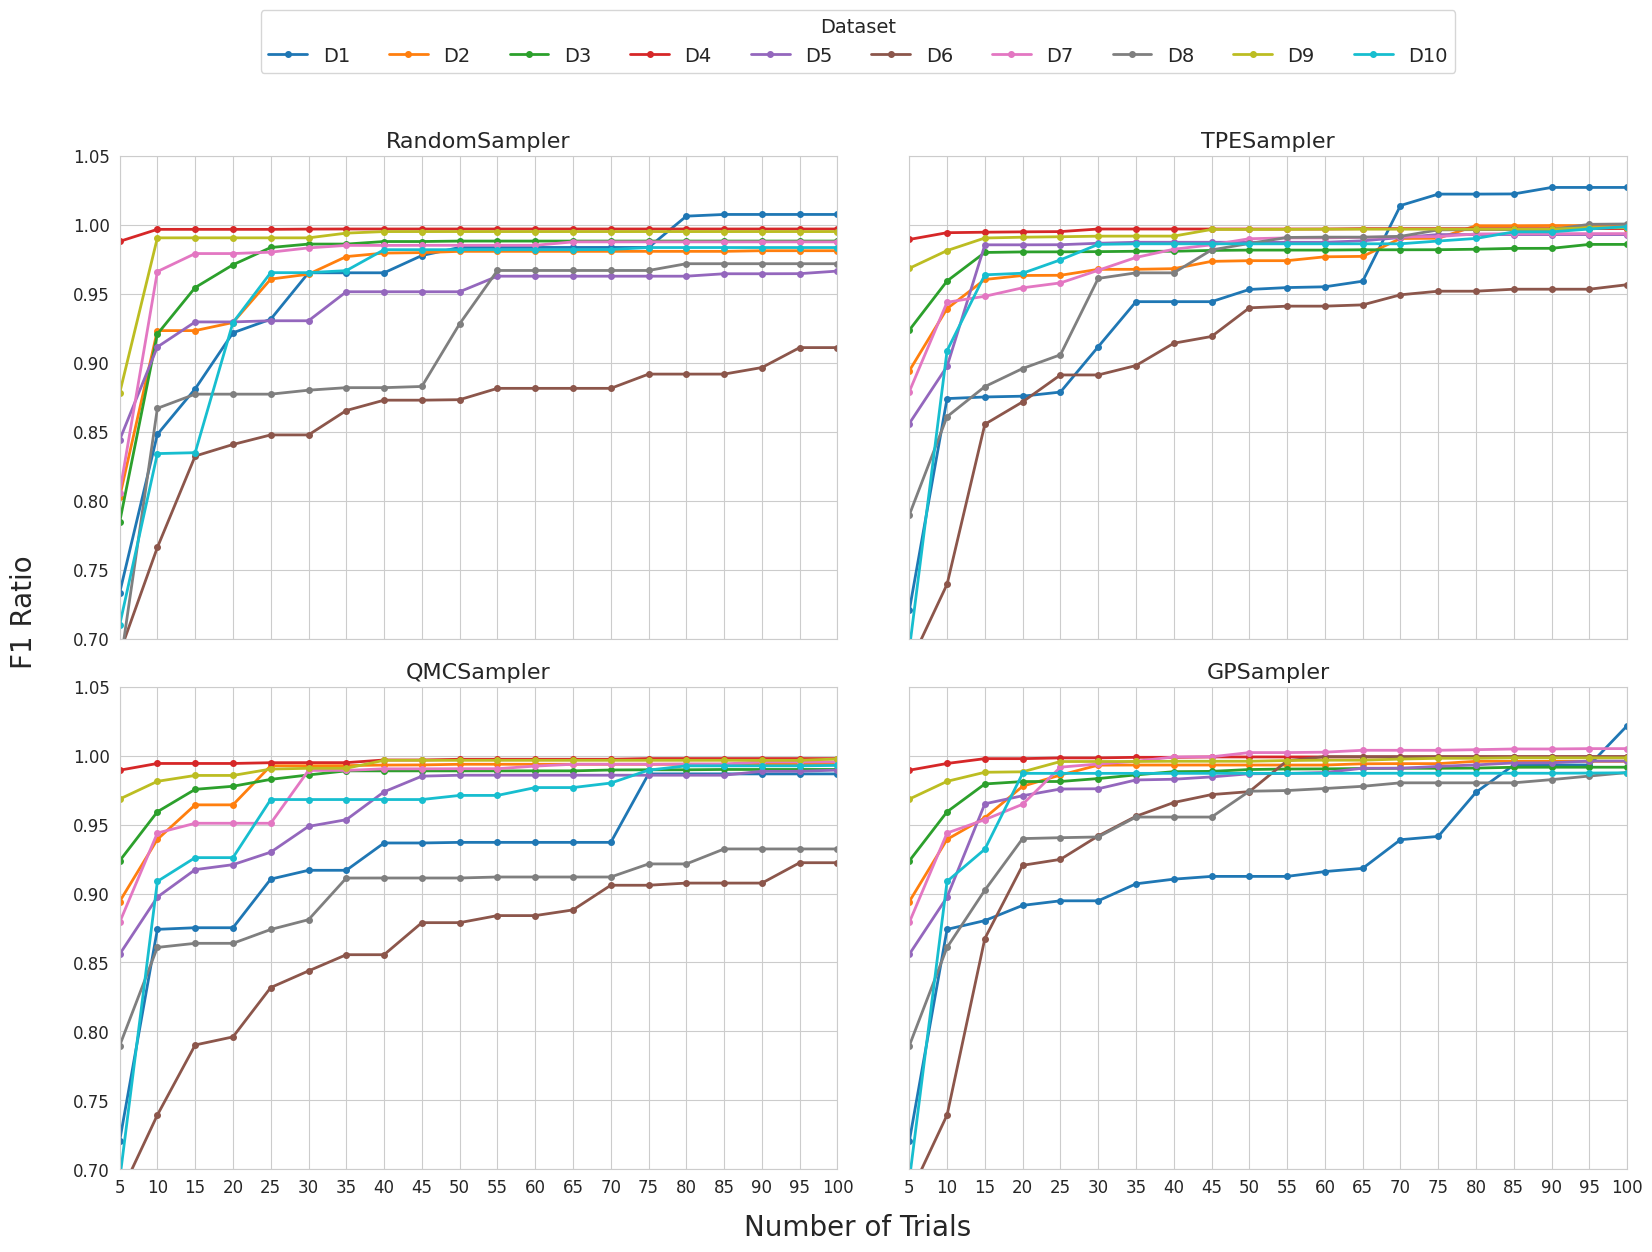

In [181]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True, sharex=True)
axes = axes.flatten()

for i, sampler in enumerate(methods):
    ax = axes[i]
    for dataset, values in data.items():
        max_f1_per_seed_trial = values[sampler].groupby(['max_trials', 'seed'])['f1'].max().reset_index()
        avg_max_f1_per_trial = max_f1_per_seed_trial.groupby('max_trials')['f1'].mean().reset_index()

        gb_f1_value = gb_f1[gb_f1['dataset'] == dataset]['GB-F1'].values[0]

        avg_max_f1_per_trial['f1_ratio'] = avg_max_f1_per_trial['f1'] / gb_f1_value

        ax.plot(avg_max_f1_per_trial['max_trials'], avg_max_f1_per_trial['f1_ratio'], label=f'{dataset}', lw=2, marker='o', markersize=4)
        ax.set_xticks(range(5, 105, 5))

    ax.set_title(f'{sampler}', fontsize=16)
    ax.set_xlim(5, 100)
    ax.set_ylim(0.7, avg_max_f1_per_trial['f1_ratio'].max() + 0.05)
    ax.set_yticks(np.arange(0.7, avg_max_f1_per_trial['f1_ratio'].max() + 0.1, 0.05))
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Dataset', loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=10, fontsize=14, title_fontsize=14)
fig.text(0.5, -0.02, 'Number of Trials', ha='center', fontsize=20)
fig.text(-0.03, 0.5, 'F1 Ratio', va='center', rotation='vertical', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.88, wspace=0.1, hspace=0.1)  # Increase wspace and hspace as needed
plt.savefig(FIGURES_DIR + 'f1_ratio_vs_trials_subplots.png', bbox_inches='tight')
plt.show()

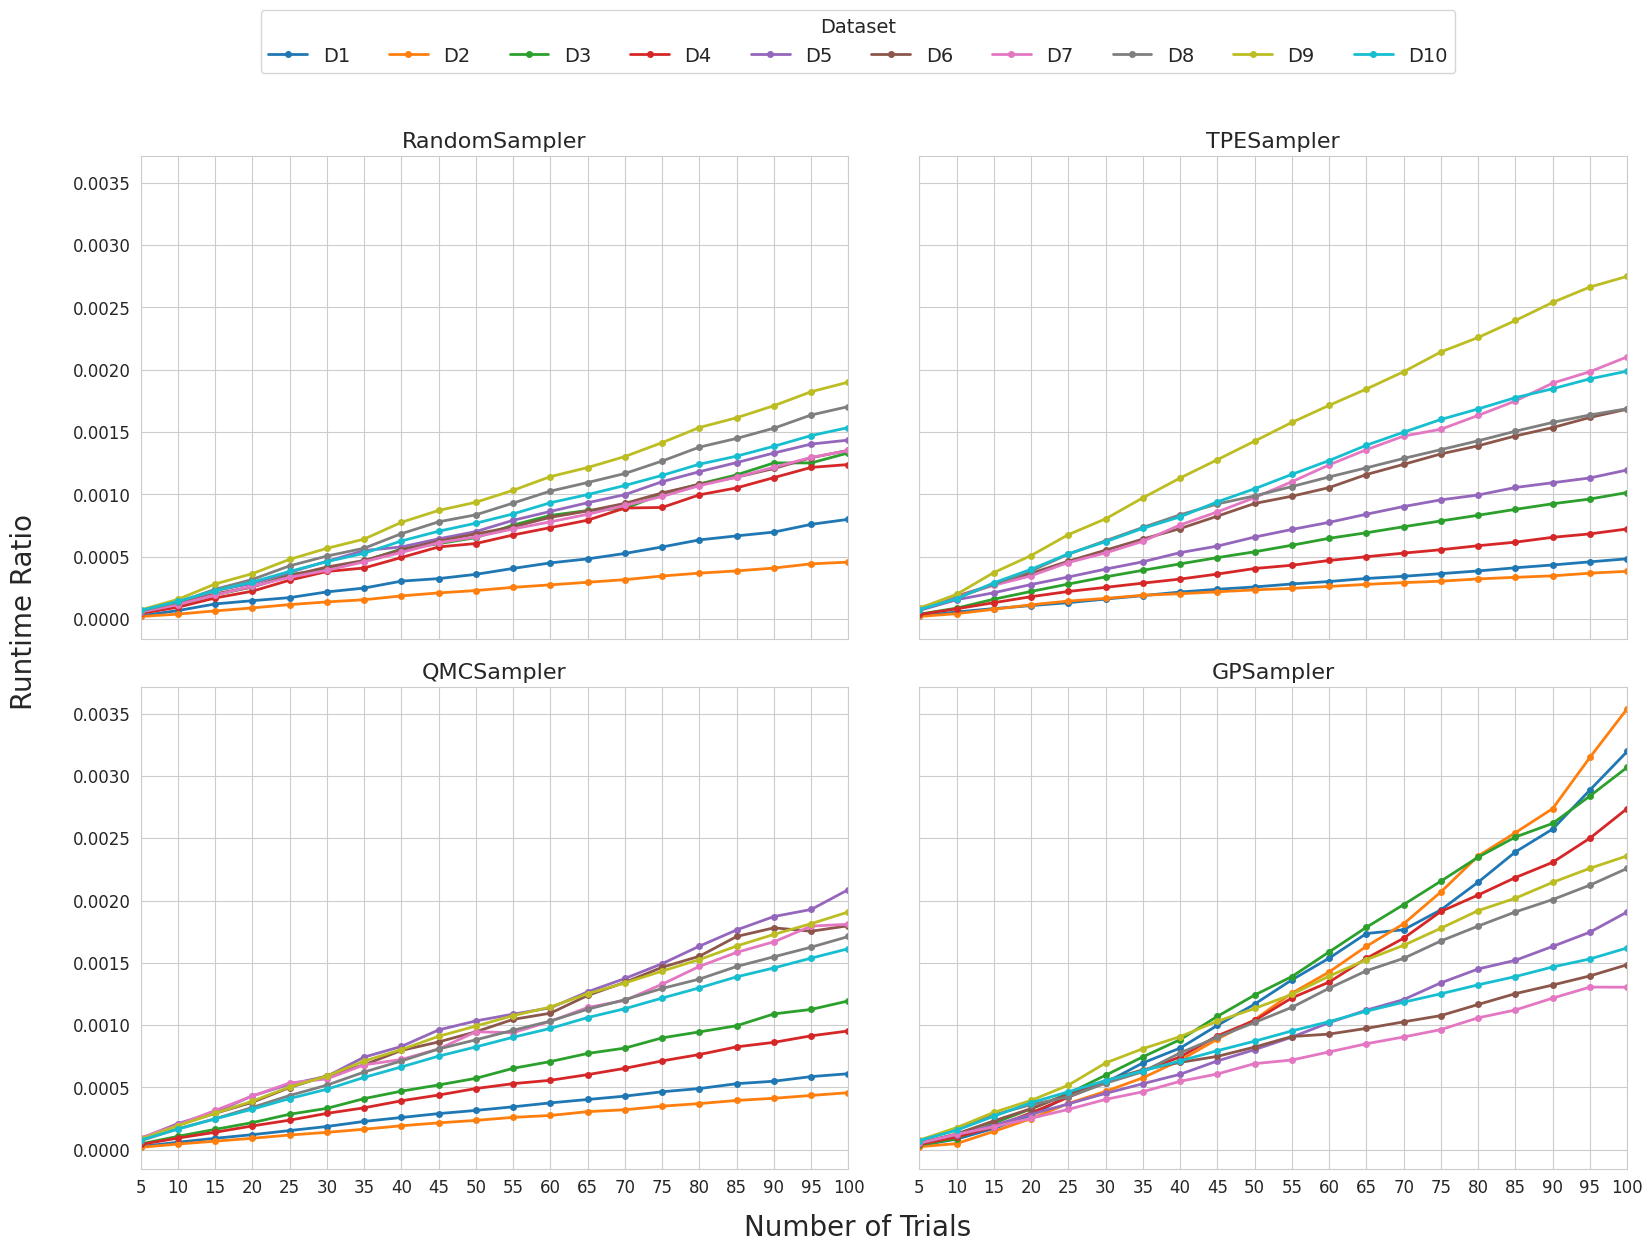

In [182]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True, sharex=True)
axes = axes.flatten()

for i, sampler in enumerate(methods):
    ax = axes[i]
    for dataset, values in data.items():
        sum_runtime_per_trial = values[sampler].groupby(['max_trials', 'seed'])['runtime'].sum().reset_index()
        avg_runtime_per_max_trials = sum_runtime_per_trial.groupby('max_trials')['runtime'].mean().reset_index()
        avg_runtime_per_max_trials.columns = ['max_trials', 'avg_runtime']

        gb_runtime_value = gb_runtime[gb_runtime['dataset'] == dataset]['runtime_sum'].values[0]

        avg_runtime_per_max_trials['runtime_ratio'] = avg_runtime_per_max_trials['avg_runtime'] / gb_runtime_value

        ax.plot(avg_runtime_per_max_trials['max_trials'], avg_runtime_per_max_trials['runtime_ratio'], 
                label=f'{dataset}', lw=2, marker='o', markersize=4)
        ax.set_xticks(range(5, 105, 5))

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_title(f'{sampler}', fontsize=16)
    # ax.set_xlabel('Number of Trials', fontsize=12)
    # ax.set_ylabel('Runtime Ratio', fontsize=12)
    ax.set_xlim(5, 100)
    ax.grid(True)

handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title='Dataset', loc='right', bbox_to_anchor=(1.1, 0.5), ncol=1, fontsize=14, title_fontsize=14)
fig.legend(handles, labels, title='Dataset', loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=10, fontsize=14, title_fontsize=14)

fig.text(0.5, -0.02, 'Number of Trials', ha='center', fontsize=20)
fig.text(-0.03, 0.5, 'Runtime Ratio', va='center', rotation='vertical', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.88, wspace=0.1, hspace=0.1)
plt.savefig(FIGURES_DIR + 'runtimes_ratio_vs_trials_subplots.png', bbox_inches='tight')
plt.show()

#### F1

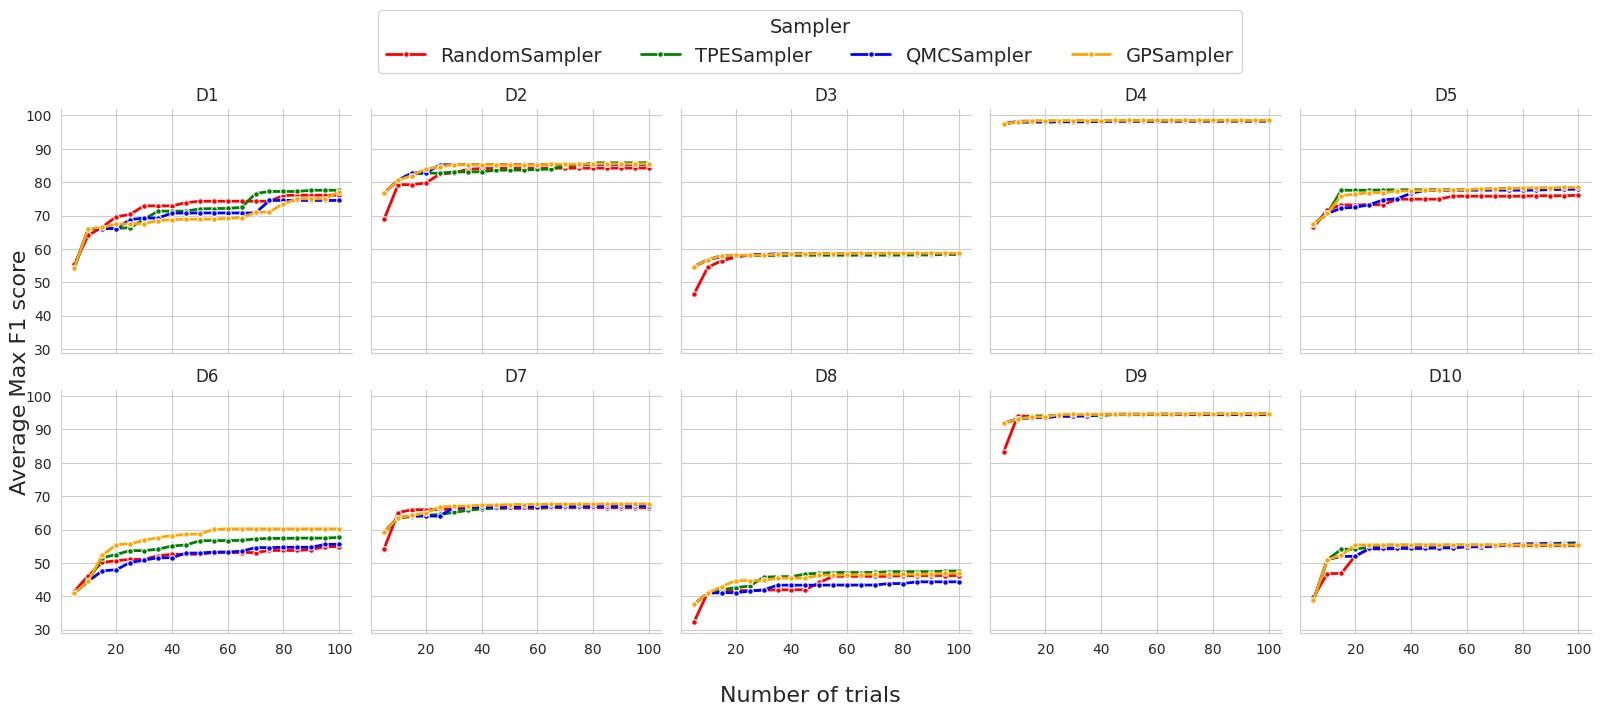

In [186]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6), sharex=True, sharey=True)
axes = axes.flatten()

def plot_convergence(ax, dataset_name, dataset_data, auc_df, methods):
    for idx, method in enumerate(methods):
        df = dataset_data[method]
        max_f1_per_seed_trial = df.groupby(['max_trials', 'seed'])['f1'].max().reset_index()      
        avg_max_f1_per_trial = max_f1_per_seed_trial.groupby('max_trials')['f1'].mean().reset_index()
        x = avg_max_f1_per_trial['max_trials'].values
        y = avg_max_f1_per_trial['f1'].values

        area_trapz = trapezoid(y, x)  
        max_x = max(x) if x.size > 0 else 0
        max_y = 100 
        square_area = max_x * max_y
        normalized_auc = area_trapz / square_area if square_area > 0 else 0

        new_row = pd.DataFrame({
            'dataset': [dataset_name],
            'sampler': [method],
            'auc': [normalized_auc],
            'runtime': [df['runtime'].sum()] 
        })

        auc_df = pd.concat([auc_df, new_row], ignore_index=True)
        sns.lineplot(ax=ax, x='max_trials', y='f1', lw=2, marker='o', markersize=4, data=avg_max_f1_per_trial, label=method, color=palette[method], legend=None)

    ax.set_title(f'{dataset_name}', fontsize=12)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    return auc_df

auc_df = pd.DataFrame(columns=['dataset', 'sampler', 'auc', 'runtime'])
for i in range(1, 11):
    dataset_name = f'D{i}'
    ax = axes[i-1]
    auc_df = plot_convergence(ax, dataset_name, data[dataset_name], auc_df, methods)
    ax.set_xlabel('')
    ax.set_ylabel('')

handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=16, bbox_to_anchor=(0.5, -0.15))
fig.legend(handles, labels, title='Sampler', loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=5, fontsize=14, title_fontsize=14)

fig.text(0.5, -0.05, 'Number of trials', ha='center', fontsize=16)
fig.text(-0.00, 0.5, 'Average Max F1 score', va='center', rotation='vertical', fontsize=16)
plt.tight_layout()
plt.savefig('./figures/f1_convergence_plots.png', bbox_inches='tight')
plt.show()

#### Runtime

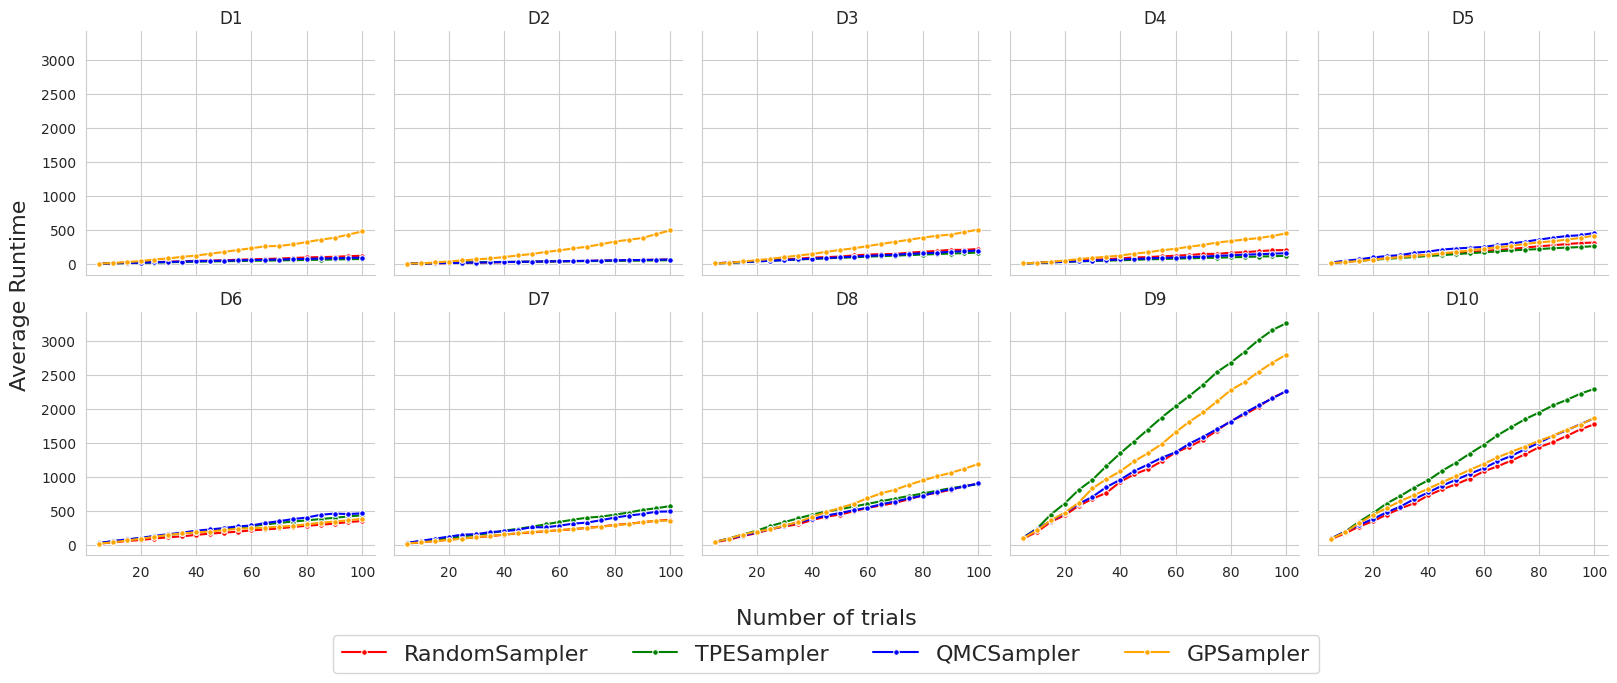

In [175]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6), sharex=True, sharey=True)
axes = axes.flatten()

def plot_convergence(ax, dataset_name, dataset_data):
    for idx, method in enumerate(methods):
        df = dataset_data[method]
        sum_runtime_per_trial = df.groupby(['max_trials', 'seed'])['runtime'].sum().reset_index()
        avg_runtime_per_max_trials = sum_runtime_per_trial.groupby('max_trials')['runtime'].mean().reset_index()
        avg_runtime_per_max_trials.columns = ['max_trials', 'avg_runtime']
        sns.lineplot(ax=ax, x='max_trials', y='avg_runtime', marker='o', markersize=4, data=avg_runtime_per_max_trials, label=method, color=palette[method], legend=None)
    ax.set_title(f'{dataset_name}', fontsize=12)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for i in range(1, 11):
    dataset_name = f'D{i}'
    ax = axes[i-1]
    plot_convergence(ax, dataset_name, data[dataset_name])
    ax.set_xlabel('')
    ax.set_ylabel('')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=16, bbox_to_anchor=(0.5, -0.15))
fig.text(0.5, -0.05, 'Number of trials', ha='center', fontsize=16)
fig.text(-0.01, 0.5, 'Average Runtime', va='center', rotation='vertical', fontsize=16)
plt.tight_layout()
plt.savefig('./figures/runtime_convergence_plots.png', bbox_inches='tight')
plt.show()

### AUC diagrams

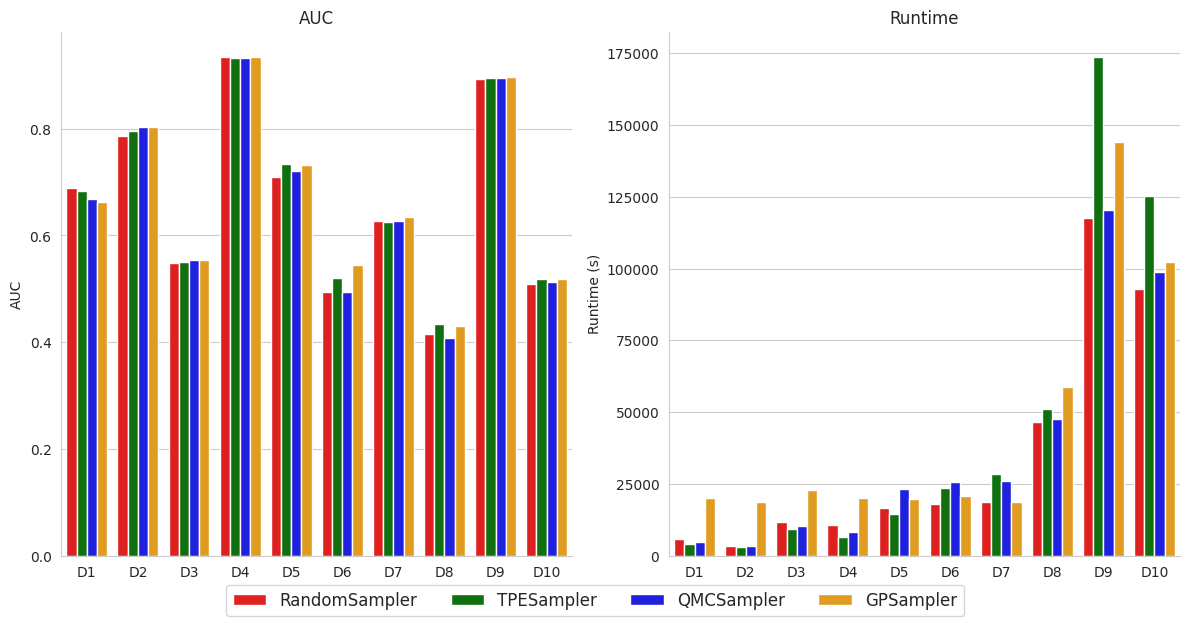

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

df = auc_df
methods = df['sampler'].unique()

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# Using a more distinguishable color palette
# palette = sns.color_palette("tab10", n_colors=len(methods))

sns.barplot(ax=axes[0], x='dataset', y='auc', hue='sampler', data=df, palette=palette)
axes[0].set_title('AUC', fontsize=12)
axes[0].set_ylabel('AUC')
axes[0].get_legend().remove()

sns.barplot(ax=axes[1], x='dataset', y='runtime', hue='sampler', data=df, palette=palette)
axes[1].set_title('Runtime', fontsize=12)
axes[1].set_ylabel('Runtime (s)')
axes[1].get_legend().remove()

# remove upper and right frame borders
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('')

# Retrieve handles and labels for legend
handles, labels = axes[0].get_legend_handles_labels()

# Place legend below the axes
fig.legend(handles, labels, loc='lower center', ncol=len(methods), bbox_to_anchor=(0.5, -0.05), fontsize=12)

plt.tight_layout()

# Ensure the legend is included in the saved figure
# plt.savefig('./figures/auc.png', bbox_inches='tight')
plt.show()

## Best results per approach

### Best samplers performance per dataset

In [37]:
best_f1_conf_df = pd.DataFrame()

datasets = [f'D{i}' for i in range(1, 11)]
samplers = ['QMCSampler', 'TPESampler', 'RandomSampler', 'GPSampler']

for dataset in datasets:
    for sampler in samplers:
        if dataset in data and sampler in data[dataset]:
            df = data[dataset][sampler]
            
            idx_max_f1 = df['f1'].idxmax()
            
            best_f1_row = df.loc[[idx_max_f1]]
            
            best_f1_row['dataset'] = dataset
            best_f1_row['sampler'] = sampler
            
            best_f1_conf_df = pd.concat([best_f1_conf_df, best_f1_row], ignore_index=True)

best_f1_per_dataset = best_f1_conf_df.loc[best_f1_conf_df.groupby('dataset')['f1'].idxmax()]

best_f1_per_dataset = best_f1_per_dataset.reset_index(drop=True)
best_f1_per_dataset

gridsearch_trials = all_trials[all_trials['sampler'] == 'gridsearch']

best_gridsearch_scores = gridsearch_trials.groupby('dataset')['f1'].max().reset_index()

best_gridsearch_scores.rename(columns={'f1': 'Best Gridsearch Score'}, inplace=True)

best_f1_per_dataset = pd.merge(best_f1_per_dataset, best_gridsearch_scores, on='dataset', how='left')

best_f1_per_dataset[['trial', 'dataset', 'sampler', 'max_trials', 'f1', 'Best Gridsearch Score', 'clustering', 'lm', 'k', 'threshold']]
# best_f1_per_dataset

,trial,dataset,sampler,max_trials,f1,Best Gridsearch Score,clustering,lm,k,threshold
0,55,D1,TPESampler,60,78.4314,75.5319,ConnectedComponentsClustering,st5,73,0.874280
1,27,D10,TPESampler,30,56.1133,56.1170,KiralyMSMApproximateClustering,st5,2,0.269090
2,99,D2,TPESampler,100,85.8486,85.8486,UniqueMappingClustering,st5,10,0.594537
3,22,D3,RandomSampler,25,58.9691,59.1887,UniqueMappingClustering,sminilm,10,0.429178
4,70,D4,GPSampler,75,98.5566,98.6011,UniqueMappingClustering,st5,1,0.759879
5,74,D5,GPSampler,75,78.9235,78.7255,ConnectedComponentsClustering,st5,1,0.765179
6,56,D6,GPSampler,60,60.4225,60.2534,UniqueMappingClustering,sminilm,1,0.555229
7,78,D7,GPSampler,80,67.7600,67.3557,ConnectedComponentsClustering,sminilm,84,0.811881
8,66,D8,TPESampler,70,49.5337,47.5550,KiralyMSMApproximateClustering,st5,75,0.920773
9,20,D9,TPESampler,25,94.9241,94.8861,KiralyMSMApproximateClustering,st5,65,0.830563


### Best grid-search trials

In [38]:
all_gridsearch_runtime_per_dataset = gridsearch_trials.groupby('dataset')['runtime'].sum().reset_index()

# in hours

all_gridsearch_runtime_per_dataset['runtime'] = all_gridsearch_runtime_per_dataset['runtime'] / 3600
all_gridsearch_runtime_per_dataset['runtime'] = all_gridsearch_runtime_per_dataset['runtime'].astype(int)

all_gridsearch_runtime_per_dataset.rename(columns={'runtime': 'Gridsearch (h)'}, inplace=True)

all_gridsearch_runtime_per_dataset 

,dataset,Gridsearch (h)
0,D1,41
1,D10,320
2,D2,38
3,D3,45
4,D4,45
5,D5,60
6,D6,71
7,D7,74
8,D8,145
9,D9,329


In [39]:
gridsearch_trials = all_trials[all_trials['sampler'] == 'gridsearch']

idx_best_gridsearch_scores = gridsearch_trials.groupby('dataset')['f1'].idxmax()

best_gridsearch_scores = gridsearch_trials.loc[idx_best_gridsearch_scores].reset_index(drop=True)

best_gridsearch_latex = best_gridsearch_scores[['trial', 'dataset', 'clustering', 'lm', 'k', 'threshold',  'f1', 'runtime']]

# best_gridsearch_latex.rename(columns={'f1': 'Best Gridsearch F1'}, inplace=True)

# add runtime from all_gridsearch_runtime_per_dataset['runtime'] = all_gridsearch_runtime_per_dataset['runtime'] / 3600
best_gridsearch_latex = pd.merge(best_gridsearch_latex, all_gridsearch_runtime_per_dataset, on='dataset', how='left')

best_gridsearch_latex

,trial,dataset,clustering,lm,k,threshold,f1,runtime,Gridsearch (h)
0,20435,D1,ConnectedComponentsClustering,smpnet,3,0.90,75.5319,2.879455,41
1,30130,D10,KiralyMSMApproximateClustering,st5,2,0.65,56.1170,28.772136,320
2,14785,D2,UniqueMappingClustering,st5,10,0.35,85.8486,2.517395,38
3,7064,D3,UniqueMappingClustering,sminilm,7,0.45,59.1887,1.437337,45
4,6282,D4,UniqueMappingClustering,st5,1,0.80,98.6011,1.437004,45
5,13276,D5,KiralyMSMApproximateClustering,st5,6,0.75,78.7255,2.987267,60
6,4292,D6,UniqueMappingClustering,sminilm,1,0.55,60.2534,0.919242,71
7,432,D7,ConnectedComponentsClustering,sminilm,93,0.80,67.3557,28.643893,74
8,13979,D8,KiralyMSMApproximateClustering,st5,4,0.90,47.5550,3.193082,145
9,5,D9,KiralyMSMApproximateClustering,st5,42,0.80,94.8861,21.376128,329


In [40]:
best_gridsearch_latex = best_gridsearch_latex[['dataset', 'lm', 'k', 'clustering', 'threshold',  'f1', 'runtime', 'Gridsearch (h)']]
best_gridsearch_latex['f1'] = best_gridsearch_latex['f1'].round(2)
# best_gridsearch_latex['runtime'] = best_gridsearch_latex['runtime'].round(2)
best_gridsearch_latex.rename(columns={'dataset': 'Dataset', 'lm': 'LM', 'k': 'K', 'clustering': 'Clustering', 'threshold': 'Threshold', 'f1': 'F1', 'runtime': 'ETEER runtime (s)'}, inplace=True)
best_gridsearch_latex_print = best_gridsearch_latex.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|c|c|', longtable=False)
print(best_gridsearch_latex_print)

\begin{tabular}{|c|c|c|c|c|c|c|c|}
\toprule
Dataset & LM & K & Clustering & Threshold & F1 & ETEER runtime (s) & Gridsearch (h) \\
\midrule
D1 & smpnet & 3 & ConnectedComponentsClustering & 0.900000 & 75.530000 & 2.879455 & 41 \\
D10 & st5 & 2 & KiralyMSMApproximateClustering & 0.650000 & 56.120000 & 28.772136 & 320 \\
D2 & st5 & 10 & UniqueMappingClustering & 0.350000 & 85.850000 & 2.517395 & 38 \\
D3 & sminilm & 7 & UniqueMappingClustering & 0.450000 & 59.190000 & 1.437337 & 45 \\
D4 & st5 & 1 & UniqueMappingClustering & 0.800000 & 98.600000 & 1.437004 & 45 \\
D5 & st5 & 6 & KiralyMSMApproximateClustering & 0.750000 & 78.730000 & 2.987267 & 60 \\
D6 & sminilm & 1 & UniqueMappingClustering & 0.550000 & 60.250000 & 0.919242 & 71 \\
D7 & sminilm & 93 & ConnectedComponentsClustering & 0.800000 & 67.360000 & 28.643893 & 74 \\
D8 & st5 & 4 & KiralyMSMApproximateClustering & 0.900000 & 47.560000 & 3.193082 & 145 \\
D9 & st5 & 42 & KiralyMSMApproximateClustering & 0.800000 & 94.890000 & 21.3

/tmp/ipykernel_1442843/1045966177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_gridsearch_latex['f1'] = best_gridsearch_latex['f1'].round(2)
/tmp/ipykernel_1442843/1045966177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_gridsearch_latex.rename(columns={'dataset': 'Dataset', 'lm': 'LM', 'k': 'K', 'clustering': 'Clustering', 'threshold': 'Threshold', 'f1': 'F1', 'runtime': 'ETEER runtime (s)'}, inplace=True)


### Global best F1s

In [41]:
res=all_trials.groupby('dataset')['f1']
res

In [42]:
df_max_f1 = all_trials.loc[all_trials.groupby('dataset')['f1'].idxmax(), ['dataset', 'clustering', 'lm', 'k', 'threshold', 'sampler', 'f1']]
df_max_f1

# change  columns order and rename to Dataset, LM, k, Clustering, Threshold, Sampler, F1

df_max_f1 = df_max_f1[['dataset', 'lm', 'k', 'clustering', 'threshold', 'sampler', 'f1']]

df_max_f1.rename(columns={'dataset': 'Dataset', 'lm': 'LM', 'k': 'k', 'clustering': 'Clustering', 'threshold': 'Threshold', 'sampler': 'Sampler', 'f1': 'F1'}, inplace=True)

df_max_f1['F1'] = df_max_f1['F1'].round(2)

df_max_f1_latex = df_max_f1.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|c|', longtable=False)
print(df_max_f1_latex)

\begin{tabular}{|c|c|c|c|c|c|c|}
\toprule
Dataset & LM & k & Clustering & Threshold & Sampler & F1 \\
\midrule
D1 & st5 & 73 & ConnectedComponentsClustering & 0.874280 & tpe & 78.430000 \\
D10 & st5 & 2 & KiralyMSMApproximateClustering & 0.650000 & gridsearch & 56.120000 \\
D2 & st5 & 10 & UniqueMappingClustering & 0.594537 & tpe & 85.850000 \\
D3 & sminilm & 7 & UniqueMappingClustering & 0.450000 & gridsearch & 59.190000 \\
D4 & st5 & 1 & UniqueMappingClustering & 0.800000 & gridsearch & 98.600000 \\
D5 & st5 & 1 & ConnectedComponentsClustering & 0.765179 & gps & 78.920000 \\
D6 & sminilm & 1 & UniqueMappingClustering & 0.555229 & gps & 60.420000 \\
D7 & sminilm & 84 & ConnectedComponentsClustering & 0.811881 & gps & 67.760000 \\
D8 & st5 & 75 & KiralyMSMApproximateClustering & 0.920773 & tpe & 49.530000 \\
D9 & st5 & 65 & KiralyMSMApproximateClustering & 0.830563 & tpe & 94.920000 \\
\bottomrule
\end{tabular}



## Default configuration results

In [43]:
DEFAULT_CLUSTERING = "UniqueMappingClustering"
DEFAULT_THRESHOLD = 0.5
DEFAULT_LM = 'st5'
DEFAULT_K = 10

default_performance =  all_trials[(all_trials['sampler'] == 'gridsearch') & (all_trials['clustering'] == DEFAULT_CLUSTERING) & (all_trials['threshold'] == DEFAULT_THRESHOLD) & (all_trials['lm'] == DEFAULT_LM) & (all_trials['k'] == DEFAULT_K)]
default_performance.to_csv('./sheets/default_eteer_performance.csv', index=False)   
default_performance

,trial,dataset,clustering,lm,k,threshold,sampler,seed,precision,recall,f1,runtime
234761,24761,D4,UniqueMappingClustering,st5,10,0.5,gridsearch,42,96.4411,98.6960,97.5556,4.450685
259403,9503,D1,UniqueMappingClustering,st5,10,0.5,gridsearch,42,31.2057,98.8764,47.4394,1.903656
322757,32957,D9,UniqueMappingClustering,st5,10,0.5,gridsearch,42,88.2353,96.1872,92.0398,13.108807
349917,20217,D2,UniqueMappingClustering,st5,10,0.5,gridsearch,42,86.8696,84.8513,85.8486,3.278949
401374,31774,D10,UniqueMappingClustering,st5,10,0.5,gridsearch,42,60.4309,48.2089,53.6324,27.956838
447548,38048,D8,UniqueMappingClustering,st5,10,0.5,gridsearch,42,23.9857,70.6917,35.8182,4.462647
455718,6318,D3,UniqueMappingClustering,st5,10,0.5,gridsearch,42,52.3169,63.4633,57.3535,1.485090
503014,13714,D7,UniqueMappingClustering,st5,10,0.5,gridsearch,42,22.2397,90.1370,35.6768,2.210989
536950,7750,D6,UniqueMappingClustering,st5,10,0.5,gridsearch,42,19.2071,72.7612,30.3916,1.812118
591259,22159,D5,UniqueMappingClustering,st5,10,0.5,gridsearch,42,42.2968,90.9553,57.7419,5.054655


In [44]:
default_performance_to_latex = default_performance[['dataset', 'f1', 'runtime']]

default_performance_to_latex['f1'] = default_performance_to_latex['f1'].round(2)
default_performance_to_latex['runtime'] = default_performance_to_latex['runtime'].round(2)

default_performance_to_latex = default_performance_to_latex.to_latex(index=False, header=True, column_format='|c|c|c|', longtable=False)
print(default_performance_to_latex)

/tmp/ipykernel_1442843/3011196692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_performance_to_latex['f1'] = default_performance_to_latex['f1'].round(2)
/tmp/ipykernel_1442843/3011196692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_performance_to_latex['runtime'] = default_performance_to_latex['runtime'].round(2)


\begin{tabular}{|c|c|c|}
\toprule
dataset & f1 & runtime \\
\midrule
D4 & 97.560000 & 4.450000 \\
D1 & 47.440000 & 1.900000 \\
D9 & 92.040000 & 13.110000 \\
D2 & 85.850000 & 3.280000 \\
D10 & 53.630000 & 27.960000 \\
D8 & 35.820000 & 4.460000 \\
D3 & 57.350000 & 1.490000 \\
D7 & 35.680000 & 2.210000 \\
D6 & 30.390000 & 1.810000 \\
D5 & 57.740000 & 5.050000 \\
\bottomrule
\end{tabular}



# **Problem 2:** Missing ground-truth file

## Joining specs with trials

In [45]:
dataset = 'gridsearch'

trials = pd.read_csv('./data/trials.csv', sep=',')

if dataset == 'gridsearch':
    trials = trials[trials['sampler']=='gridsearch']
elif dataset == 'all':
    pass
else:
    trials = trials[trials['sampler']!='gridsearch']

# trials = trials[trials['f1']!=0]

# Round column in 4 decimals
# trials['f1'] = trials['f1'].round(4)
trials['threshold'] = trials['threshold'].round(6)

dataset_specs = pd.read_csv('./data/dataset_specs.csv', sep=',')
datasets = dataset_specs['dataset'].unique()
trials = pd.merge(trials, dataset_specs, on='dataset')

trials.drop_duplicates(inplace=True)

features = ['clustering', 'lm', 'k', 'threshold', 'InputEntityProfiles', 'NumberOfAttributes', 'NumberOfDistinctValues', 
            'NumberOfNameValuePairs', 'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity', 
            'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute', 'NumberOfMissingNVpairs', 
            'AverageValueLength', 'AverageValueTokens', 'MaxValuesPerEntity']
trials = trials[features + ['f1', 'dataset']]
trials_sample = trials.sample(5)
# trials_sample.to_excel('trials_sample.xlsx', index=False)

In [46]:
trials_sample

,clustering,lm,k,threshold,InputEntityProfiles,NumberOfAttributes,NumberOfDistinctValues,NumberOfNameValuePairs,AverageNVPairsPerEntity,AverageDistinctValuesPerEntity,AverageNVpairsPerAttribute,AverageDistinctValuesPerAttribute,NumberOfMissingNVpairs,AverageValueLength,AverageValueTokens,MaxValuesPerEntity,f1,dataset
93795,ConnectedComponentsClustering,fasttext,42,0.05,63869,4,129067,208065,3.26,2.02,52016.25,32266.75,47411.0,108.15,19.38,4,0.0000,D9
208769,ConnectedComponentsClustering,word2vec,2,0.25,24628,6,62834,128458,5.22,2.55,21409.67,10472.33,19310.0,102.34,23.85,6,0.0000,D8
354910,UniqueMappingClustering,sent_glove,35,0.85,12928,18,12471,42196,3.26,0.96,2344.22,692.83,61228.0,73.93,14.62,8,33.8635,D6
16997,UniqueMappingClustering,smpnet,73,0.20,4910,4,6592,19626,4.00,1.34,4906.50,1648.00,14.0,129.75,23.01,4,95.5403,D4
186221,KiralyMSMApproximateClustering,sent_glove,63,0.80,50797,10,424346,971445,19.12,8.35,97144.50,42434.60,65400000.0,283.02,62.72,1306,3.9361,D10


In [47]:
print(trials_sample.columns.tolist())
t_figure = trials_sample[['dataset','InputEntityProfiles', 'NumberOfAttributes', 'NumberOfDistinctValues', 'NumberOfNameValuePairs', 'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity', 'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute', 'NumberOfMissingNVpairs', 'AverageValueLength', 'AverageValueTokens', 'MaxValuesPerEntity', 'lm', 'k', 'clustering','threshold', 'f1']]

t_figure.to_csv('./sheets/trials_sample.csv', index=False)

['clustering', 'lm', 'k', 'threshold', 'InputEntityProfiles', 'NumberOfAttributes', 'NumberOfDistinctValues', 'NumberOfNameValuePairs', 'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity', 'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute', 'NumberOfMissingNVpairs', 'AverageValueLength', 'AverageValueTokens', 'MaxValuesPerEntity', 'f1', 'dataset']


## Boxplots & Distribution plots


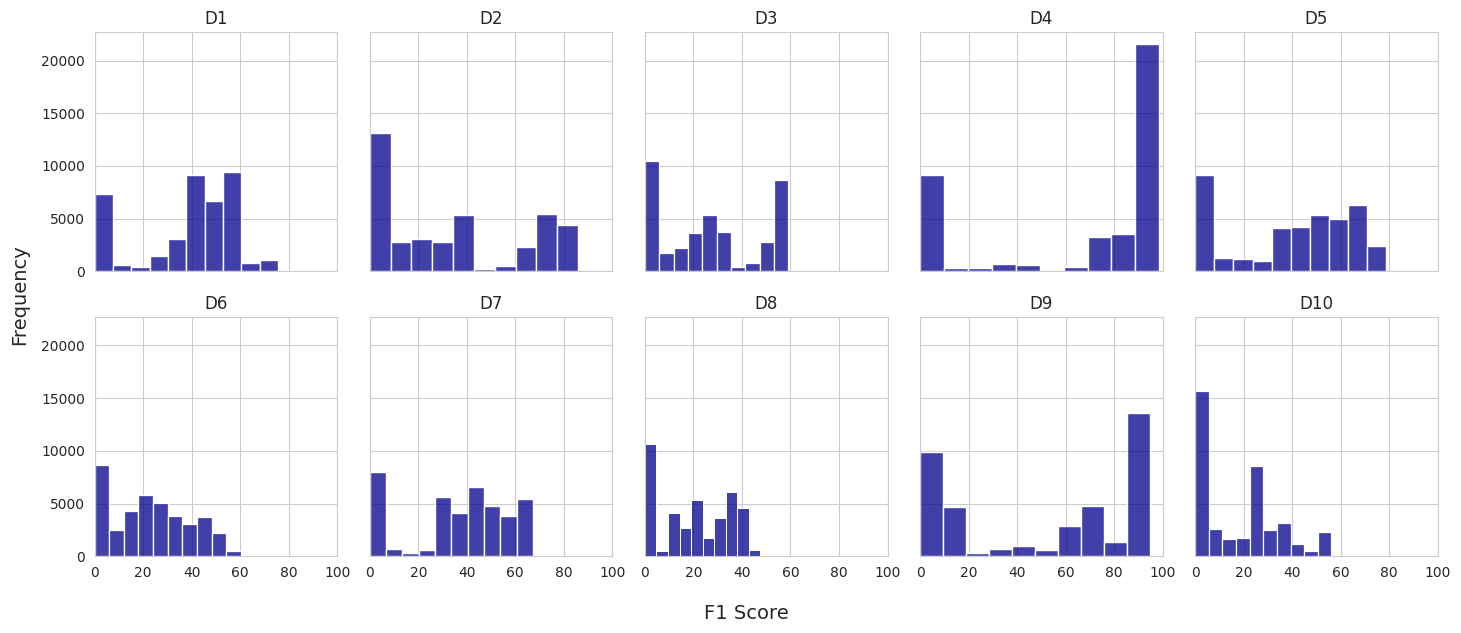

In [48]:
raw_trials = trials[['dataset', 'clustering', 'lm', 'k', 'threshold', 'f1']].copy()

raw_trials['threshold'] = raw_trials['threshold'].round(6)
raw_trials['k'] = raw_trials['k'].astype(int)

unique_raw_trials = raw_trials.drop_duplicates(subset=['dataset','clustering', 'lm', 'k', 'threshold'])

fig, axes = plt.subplots(2, 5, figsize=(16, 6), sharex=True, sharey=True)

axes = axes.flatten()

interesting_datasets = unique_raw_trials['dataset'].unique()
interesting_datasets = sorted(interesting_datasets, key=lambda x: int(x[1:]))

for i, dataset in enumerate(interesting_datasets):
    ax = axes[i]
    sns.histplot(data=unique_raw_trials[unique_raw_trials['dataset'] == dataset], x='f1', ax=ax, bins=10, color='darkblue')
    ax.set_title(f'{dataset}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(True)
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    ax.set_xlim(0, 100)

    # default_f1 = default_performance.loc[default_performance['dataset'] == dataset, 'f1']
    # if not default_f1.empty:
    #     ax.axvline(x=default_f1.values[0], color='red', linestyle='--', label='Default F1 Score')

fig.text(0.45, -0.04, 'F1 Score', ha='center', fontsize=14)
fig.text(-0.01, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)

# import matplotlib.lines as mlines
# default_line = mlines.Line2D([], [], color='red', linestyle='--', label='Default F1 Score')
# fig.legend(handles=[default_line], loc='lower right', fontsize=12, bbox_to_anchor=(0.9, -0.1))

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig(FIGURES_DIR + 'f1_score_distribution.png', bbox_inches='tight')
plt.show()


In [49]:
f1_stats = all_trials.groupby('dataset')['f1'].agg(['min', 'max']).reset_index()
f1_stats.to_csv(TABLES_DIR + 'f1_min_max.csv', index=False)
f1_stats

,dataset,min,max
0,D1,0.0,78.4314
1,D10,0.0,56.1170
2,D2,0.0,85.8486
3,D3,0.0,59.1887
4,D4,0.0,98.6011
5,D5,0.0,78.9235
6,D6,0.0,60.4225
7,D7,0.0,67.7600
8,D8,0.0,49.5337
9,D9,0.0,94.9241


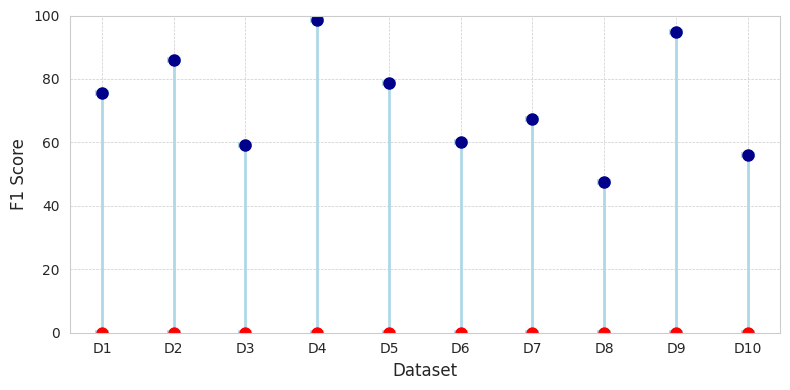

In [50]:
dataset_stats = unique_raw_trials.groupby('dataset')['f1'].agg(['min', 'max']).reset_index()

fig, ax = plt.subplots(figsize=(8, 4))

dataset_stats['dataset'] = pd.Categorical(dataset_stats['dataset'], categories=interesting_datasets, ordered=True)
dataset_stats = dataset_stats.sort_values('dataset')

ax.scatter(dataset_stats['dataset'], dataset_stats['min'], color='red', marker='.', s=250, label='Min F1 Score', zorder=2)

ax.errorbar(dataset_stats['dataset'], 
            dataset_stats['max'], 
            yerr=[dataset_stats['max'] - dataset_stats['min'], 
                  [0]*len(dataset_stats)], 
                  fmt='o', color='darkblue', ecolor='lightblue', 
                 markersize=8,
                  elinewidth=2, 
                  capsize=5, 
                  capthick=4, zorder=1)

# Add red markers for min

# Set labels and limits
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('F1 Score', fontsize=12)
ax.set_ylim(0, 100)
# ax.set_title('Min and Max F1 Scores for Each Dataset', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5)



# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.savefig(FIGURES_DIR + 'f1_score_min_max_summary.png', bbox_inches='tight')
plt.show()

## Best results per approach

In [68]:
import pandas as pd
import warnings

palette = sns.color_palette("viridis", n_colors=3)
warnings.filterwarnings("ignore", category=FutureWarning)

file_path = './without_gt/autoconf_final_results.csv'
autoconf_final_results = pd.read_csv(file_path)
def categorize_regressor(regressor):
    if '+' in regressor:
        return 'AutoML'
    elif regressor in ['NN', 'XGBRegressor', 'Ridge', 'LinearRegression', 'RandomForestRegressor', 'SVR', 'Lasso']:
        return 'DL-SKLEARN'
    else:
        return 'Other'

autoconf_final_results['EXPERIMENT'] = autoconf_final_results['REGRESSOR'].apply(categorize_regressor)
dataset_index = autoconf_final_results.columns.get_loc('DATASET') + 1
autoconf_final_results = autoconf_final_results.reindex(columns=autoconf_final_results.columns.tolist()[:dataset_index] + ['EXPERIMENT'] + autoconf_final_results.columns.tolist()[dataset_index:-1])

autoconf_final_results

,TEST_SET,DATASET,EXPERIMENT,REGRESSOR,VALIDATION_MSE,TEST_MSE,PREDICTED_F1,GLOBAL_BEST_F1,PERFORMANCE,OPTIMIZATION_TIME,BEST_REGRESSOR_FIT_TIME,BEST_REGRESSOR_PREDICTION_TIME,WITH_DATA_FEATURES,LM,K,CLUSTERING,THRESHOLD
0,D1,all,AutoML,0.88*random_forest + 0.08*gradient_boosting + ...,NaN,538.5980,54.8287,78.4314,0.6991,43440.6720,NaN,13.4146,1,st5,11.0,UniqueMappingClustering,0.7500
1,D10,all,AutoML,0.88*random_forest + 0.06*gradient_boosting + ...,NaN,2288.8816,17.2346,56.1170,0.3071,43430.0451,NaN,503.7444,1,st5,84.0,KiralyMSMApproximateClustering,0.8071
2,D2,all,AutoML,0.841*random_forest + 0.082*gradient_boosting ...,NaN,1568.3941,81.5544,85.8486,0.9500,43453.5410,NaN,476.2028,1,st5,1.0,UniqueMappingClustering,0.7530
3,D3,all,AutoML,0.88*random_forest + 0.08*gradient_boosting + ...,NaN,23.5243,56.9019,59.1887,0.9614,43452.0678,NaN,37.8720,1,sminilm,3.0,UniqueMappingClustering,0.6000
4,D4,all,AutoML,0.96*random_forest + 0.04*gradient_boosting,NaN,3249.5067,98.4510,98.6011,0.9985,43447.5507,NaN,28.3302,1,st5,1.0,ConnectedComponentsClustering,0.8742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,D6,gridsearch,DL-SKLEARN,LinearRegression,586.1393,433.3739,43.8459,60.4225,0.7257,0.0826,0.0428,0.0012,0,st5,1.0,KiralyMSMApproximateClustering,0.0500
236,D7,gridsearch,DL-SKLEARN,LinearRegression,601.8142,282.4391,48.4848,67.7600,0.7155,0.0747,0.0427,0.0013,0,st5,1.0,KiralyMSMApproximateClustering,0.0500
237,D8,gridsearch,DL-SKLEARN,LinearRegression,584.1296,444.5389,38.0861,49.5337,0.7689,0.0931,0.0551,0.0014,0,st5,1.0,KiralyMSMApproximateClustering,0.0500
238,D9,gridsearch,DL-SKLEARN,LinearRegression,523.6430,1045.9317,92.8452,94.9241,0.9781,0.0880,0.0579,0.0013,0,st5,1.0,KiralyMSMApproximateClustering,0.0500


Save to csv

In [69]:
automl_sheet = autoconf_final_results[autoconf_final_results['EXPERIMENT'] == 'AutoML']
dl_sklearn_sheet = autoconf_final_results[autoconf_final_results['EXPERIMENT'] == 'DL-SKLEARN']

automl_sheet.to_csv(TABLES_DIR + 'automl_sheet.csv', index=False)
dl_sklearn_sheet.to_csv(TABLES_DIR + 'dl_sklearn_sheet.csv', index=False)
autoconf_final_results.to_csv(TABLES_DIR + 'problem2_full.csv', index=False)

In [70]:
dataset_colors = {'gridsearch': 'blue', 'optuna': 'red', 'all': 'green', 'Best F1': 'gold'}
dataset_order = ['gridsearch', 'optuna', 'all', 'Best F1']

from matplotlib.patches import Patch

palette = {'all': 'green', 'optuna': 'red', 'gridsearch': 'blue'}
hatches = {'all': '///', 'optuna': '', 'gridsearch': 'O'}
hue_order = ['all', 'optuna', 'gridsearch']
legend_order = ['all', 'optuna', 'gridsearch', 'GB-F1']

### AutoML

In [97]:
filtered_data = data[(data['EXPERIMENT'] == 'AutoML') & (data['WITH_DATA_FEATURES'] == 1) & (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
print(filtered_data['REGRESSOR'].values.tolist())

['0.88*random_forest + 0.08*gradient_boosting + 0.04*gradient_boosting', '0.88*random_forest + 0.06*gradient_boosting + 0.04*gradient_boosting + 0.02*k_nearest_neighbors', '0.841*random_forest + 0.082*gradient_boosting + 0.065*gradient_boosting + 0.024*k_nearest_neighbors', '0.88*random_forest + 0.08*gradient_boosting + 0.04*gradient_boosting', '0.96*random_forest + 0.04*gradient_boosting', '0.82*random_forest + 0.14*extra_trees + 0.04*gradient_boosting', '0.88*random_forest + 0.08*gradient_boosting + 0.04*gradient_boosting', '0.9*random_forest + 0.06*gradient_boosting + 0.04*gradient_boosting', '0.9*random_forest + 0.06*gradient_boosting + 0.04*gradient_boosting', '0.94*random_forest + 0.06*gradient_boosting', '0.38*extra_trees + 0.36*random_forest + 0.14*gradient_boosting + 0.1*k_nearest_neighbors + 0.02*gradient_boosting', '0.78*extra_trees + 0.12*gradient_boosting + 0.1*extra_trees', '0.82*extra_trees + 0.12*gradient_boosting + 0.04*random_forest + 0.02*k_nearest_neighbors', '0.54*

In [125]:
CLUSTERINGS_SHORT = {
    'UniqueMappingClustering': 'UMC',
    'KiralyMSMApproximateClustering' : 'KMAC',
    'ConnectedComponentsClustering' : 'CCC'
}

AUTOML_REGRESSORS_SHORT = {
    'random_forest': 'RF',
    'gradient_boosting': 'GB',
    'k_nearest_neighbors': 'KNN',
    'extra_trees' : 'ET',
    'adaboost' : 'AD',
    'ard_regression' : 'ARD',
}

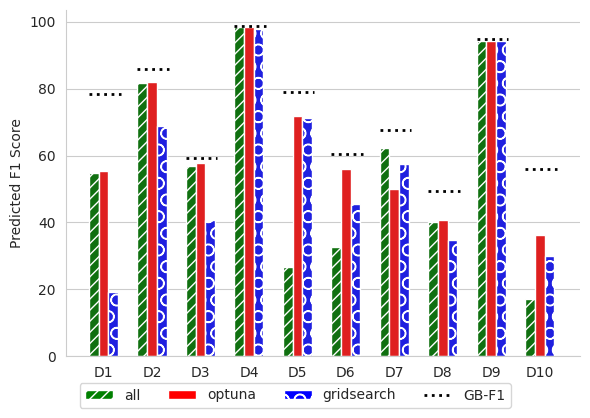

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

data = autoconf_final_results

filtered_data = data[(data['EXPERIMENT'] == 'AutoML') & (data['WITH_DATA_FEATURES'] == 1) & (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], 
                                           categories=test_set_order, ordered=True)

fig, ax = plt.subplots(figsize=(6, 4))
barplot = sns.barplot(ax=ax, data=filtered_data, x='TEST_SET', y='PREDICTED_F1', hue='DATASET',
                      hue_order=hue_order, width=0.6, order=test_set_order, palette=palette, dodge=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

max_values = filtered_data.groupby('TEST_SET')['GLOBAL_BEST_F1'].max()

for j, test_set in enumerate(test_set_order):
    max_value = max_values[test_set]
    line_position = j - 0.3
    ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.65, 
              colors='black', linestyles=':', lw=2)

for bars, dataset in zip(barplot.containers, hue_order):
    hatch = hatches[dataset]
    for bar in bars:
        bar.set_hatch(hatch)

ax.get_legend().remove()

ax.set_ylabel('Predicted F1 Score')
ax.set_xlabel('')

custom_handles = [
    Patch(facecolor=palette[label], edgecolor='white', hatch=hatches[label]) 
    for label in legend_order[:-1]
]

dashed_line = Line2D([0], [0], color='black', linestyle=':', lw=2)
custom_handles.append(dashed_line)

fig.legend(custom_handles, legend_order, loc='lower center', 
           bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize=10)

plt.tight_layout()
plt.savefig('./figures/autosklearn_f1.png', bbox_inches='tight')
plt.show()


In [111]:
df=autoconf_final_results
automl_with_data_features = df[(df['WITH_DATA_FEATURES'] == 1) & (data['EXPERIMENT'] == 'AutoML')].copy()
print(automl_with_data_features.shape)
automl_without_data_features = df[(df['WITH_DATA_FEATURES'] == 0) & (data['EXPERIMENT'] == 'AutoML')].copy()
print(automl_without_data_features.shape)
automl_concatenated_results = pd.merge(automl_with_data_features, automl_without_data_features, on=['TEST_SET', 'DATASET', 'EXPERIMENT'], how='left', suffixes=('_WITH_DATA_FEATURES', '_WITHOUT_DATA_FEATURES'))

print(automl_concatenated_results.shape)
print(automl_concatenated_results.columns.tolist())



(30, 17)
(30, 17)
(30, 31)
['TEST_SET', 'DATASET', 'EXPERIMENT', 'REGRESSOR_WITH_DATA_FEATURES', 'VALIDATION_MSE_WITH_DATA_FEATURES', 'TEST_MSE_WITH_DATA_FEATURES', 'PREDICTED_F1_WITH_DATA_FEATURES', 'GLOBAL_BEST_F1_WITH_DATA_FEATURES', 'PERFORMANCE_WITH_DATA_FEATURES', 'OPTIMIZATION_TIME_WITH_DATA_FEATURES', 'BEST_REGRESSOR_FIT_TIME_WITH_DATA_FEATURES', 'BEST_REGRESSOR_PREDICTION_TIME_WITH_DATA_FEATURES', 'WITH_DATA_FEATURES_WITH_DATA_FEATURES', 'LM_WITH_DATA_FEATURES', 'K_WITH_DATA_FEATURES', 'CLUSTERING_WITH_DATA_FEATURES', 'THRESHOLD_WITH_DATA_FEATURES', 'REGRESSOR_WITHOUT_DATA_FEATURES', 'VALIDATION_MSE_WITHOUT_DATA_FEATURES', 'TEST_MSE_WITHOUT_DATA_FEATURES', 'PREDICTED_F1_WITHOUT_DATA_FEATURES', 'GLOBAL_BEST_F1_WITHOUT_DATA_FEATURES', 'PERFORMANCE_WITHOUT_DATA_FEATURES', 'OPTIMIZATION_TIME_WITHOUT_DATA_FEATURES', 'BEST_REGRESSOR_FIT_TIME_WITHOUT_DATA_FEATURES', 'BEST_REGRESSOR_PREDICTION_TIME_WITHOUT_DATA_FEATURES', 'WITH_DATA_FEATURES_WITHOUT_DATA_FEATURES', 'LM_WITHOUT_DATA_FE

In [112]:
automl_concatenated_results[['TEST_SET', 'DATASET', 'EXPERIMENT', 'PERFORMANCE_WITH_DATA_FEATURES', 'PERFORMANCE_WITHOUT_DATA_FEATURES']].where(automl_concatenated_results['PERFORMANCE_WITH_DATA_FEATURES'] >= automl_concatenated_results['PERFORMANCE_WITHOUT_DATA_FEATURES']).dropna()

,TEST_SET,DATASET,EXPERIMENT,PERFORMANCE_WITH_DATA_FEATURES,PERFORMANCE_WITHOUT_DATA_FEATURES
2,D2,all,AutoML,0.9500,0.9143
4,D4,all,AutoML,0.9985,0.9957
9,D9,all,AutoML,0.9944,0.9656
12,D2,optuna,AutoML,0.9545,0.9159
13,D3,optuna,AutoML,0.9764,0.9701
14,D4,optuna,AutoML,0.9977,0.9957
15,D5,optuna,AutoML,0.9119,0.7963
16,D6,optuna,AutoML,0.9265,0.8467
27,D7,gridsearch,AutoML,0.8496,0.7790
29,D9,gridsearch,AutoML,0.9941,0.9932


In [113]:
automl_concatenated_results[['TEST_SET', 'DATASET', 'EXPERIMENT',  'PREDICTED_F1_WITH_DATA_FEATURES', 'PREDICTED_F1_WITHOUT_DATA_FEATURES']].where(automl_concatenated_results['PREDICTED_F1_WITH_DATA_FEATURES'] >= automl_concatenated_results['PREDICTED_F1_WITHOUT_DATA_FEATURES']).dropna()

,TEST_SET,DATASET,EXPERIMENT,PREDICTED_F1_WITH_DATA_FEATURES,PREDICTED_F1_WITHOUT_DATA_FEATURES
2,D2,all,AutoML,81.5544,78.4878
4,D4,all,AutoML,98.4510,98.1761
9,D9,all,AutoML,94.3887,91.6553
12,D2,optuna,AutoML,81.9401,78.6325
13,D3,optuna,AutoML,57.7941,57.4176
14,D4,optuna,AutoML,98.3769,98.1761
15,D5,optuna,AutoML,71.9689,62.8471
16,D6,optuna,AutoML,55.9806,51.1573
27,D7,gridsearch,AutoML,57.5722,52.7853
29,D9,gridsearch,AutoML,94.3686,94.2827


In [74]:
automl_concatenated_results.to_csv(TABLES_DIR+"automl_results.csv")

In [75]:
automl_concatenated_results[['TEST_SET', 'DATASET', 'EXPERIMENT', 'PREDICTED_F1_WITH_DATA_FEATURES', 'PREDICTED_F1_WITHOUT_DATA_FEATURES']].to_csv(TABLES_DIR+"automl_preficted_f1s_only.csv")

In [81]:
print(automl_with_data_features.columns.tolist())

['TEST_SET', 'DATASET', 'EXPERIMENT', 'REGRESSOR', 'VALIDATION_MSE', 'TEST_MSE', 'PREDICTED_F1', 'GLOBAL_BEST_F1', 'PERFORMANCE', 'OPTIMIZATION_TIME', 'BEST_REGRESSOR_FIT_TIME', 'BEST_REGRESSOR_PREDICTION_TIME', 'WITH_DATA_FEATURES', 'LM', 'K', 'CLUSTERING', 'THRESHOLD']


In [114]:
automl_with_data_features

,TEST_SET,DATASET,EXPERIMENT,REGRESSOR,VALIDATION_MSE,TEST_MSE,PREDICTED_F1,GLOBAL_BEST_F1,PERFORMANCE,OPTIMIZATION_TIME,BEST_REGRESSOR_FIT_TIME,BEST_REGRESSOR_PREDICTION_TIME,WITH_DATA_FEATURES,LM,K,CLUSTERING,THRESHOLD
0,D1,all,AutoML,0.88*random_forest + 0.08*gradient_boosting + ...,NaN,538.5980,54.8287,78.4314,0.6991,43440.6720,NaN,13.4146,1,st5,11.0,UniqueMappingClustering,0.7500
1,D10,all,AutoML,0.88*random_forest + 0.06*gradient_boosting + ...,NaN,2288.8816,17.2346,56.1170,0.3071,43430.0451,NaN,503.7444,1,st5,84.0,KiralyMSMApproximateClustering,0.8071
2,D2,all,AutoML,0.841*random_forest + 0.082*gradient_boosting ...,NaN,1568.3941,81.5544,85.8486,0.9500,43453.5410,NaN,476.2028,1,st5,1.0,UniqueMappingClustering,0.7530
3,D3,all,AutoML,0.88*random_forest + 0.08*gradient_boosting + ...,NaN,23.5243,56.9019,59.1887,0.9614,43452.0678,NaN,37.8720,1,sminilm,3.0,UniqueMappingClustering,0.6000
4,D4,all,AutoML,0.96*random_forest + 0.04*gradient_boosting,NaN,3249.5067,98.4510,98.6011,0.9985,43447.5507,NaN,28.3302,1,st5,1.0,ConnectedComponentsClustering,0.8742
5,D5,all,AutoML,0.82*random_forest + 0.14*extra_trees + 0.04*g...,NaN,365.8662,26.7417,78.9235,0.3388,43493.2859,NaN,52.7047,1,sminilm,6.0,ConnectedComponentsClustering,0.8500
6,D6,all,AutoML,0.88*random_forest + 0.08*gradient_boosting + ...,NaN,340.7414,32.7573,60.4225,0.5421,43445.6240,NaN,58.3347,1,st5,95.0,ConnectedComponentsClustering,0.8556
7,D7,all,AutoML,0.9*random_forest + 0.06*gradient_boosting + 0...,NaN,397.5130,62.1735,67.7600,0.9176,43438.5699,NaN,67.9033,1,st5,1.0,UniqueMappingClustering,0.7500
8,D8,all,AutoML,0.9*random_forest + 0.06*gradient_boosting + 0...,NaN,269.5959,40.2703,49.5337,0.8130,43431.4983,NaN,58.4841,1,st5,5.0,KiralyMSMApproximateClustering,0.7000
9,D9,all,AutoML,0.94*random_forest + 0.06*gradient_boosting,NaN,2076.7660,94.3887,94.9241,0.9944,43430.4042,NaN,40.3751,1,st5,92.0,KiralyMSMApproximateClustering,0.7000


### Best reults for each dataset using AutoSKLEARN approach - WITH DATA FEATURES

In [126]:
import warnings
warnings.filterwarnings("ignore")

idx = automl_without_data_features.groupby('TEST_SET')['PREDICTED_F1'].idxmax()
max_f1_rows = automl_without_data_features.loc[idx]


best_table = max_f1_rows[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1', 'GLOBAL_BEST_F1', 'PERFORMANCE', 'OPTIMIZATION_TIME', 'BEST_REGRESSOR_PREDICTION_TIME', 'LM', 'K', 'CLUSTERING', 'THRESHOLD']]

best_table['ETEER Runtime (h)'] = best_table['BEST_REGRESSOR_PREDICTION_TIME'] + best_table['OPTIMIZATION_TIME']

best_table['OPTIMIZATION_TIME'] = best_table['OPTIMIZATION_TIME']/3600
best_table['ETEER Runtime (h)'] = best_table['ETEER Runtime (h)']/3600

# round all times in 2 decimals

best_table['OPTIMIZATION_TIME'] = best_table['OPTIMIZATION_TIME'].round(0)
best_table['OPTIMIZATION_TIME'] = best_table['OPTIMIZATION_TIME'].astype(int)
best_table['BEST_REGRESSOR_PREDICTION_TIME'] = best_table['BEST_REGRESSOR_PREDICTION_TIME'].round(0)
best_table['BEST_REGRESSOR_PREDICTION_TIME'] = best_table['BEST_REGRESSOR_PREDICTION_TIME'].astype(int)


best_table['PREDICTED_F1'] = best_table['PREDICTED_F1'].round(2)
best_table['PERFORMANCE'] = best_table['PERFORMANCE'].round(2)
best_table['GLOBAL_BEST_F1'] = best_table['GLOBAL_BEST_F1'].round(2)

best_table['K'] = best_table['K'].astype(int)
best_table['THRESHOLD'] = best_table['THRESHOLD'].round(4)

# best_table['REGRESSOR'] = 'tba'
# best_table['LM'] = 'tba'
# best_table['K'] =  'tba'
# best_table['CLUSTERING'] =  'tba'
# best_table['THRESHOLD'] =  'tba'

# replace clustering names
best_table['CLUSTERING'] = best_table['CLUSTERING'].replace(CLUSTERINGS_SHORT)

# replaxe char * with \*
# print(best_table['REGRESSOR'].values.tolist())
best_table['REGRESSOR'].replace(AUTOML_REGRESSORS_SHORT, regex=True, inplace=True)
print(best_table['REGRESSOR'].values.tolist())

best_table['REGRESSOR'] = best_table['REGRESSOR'].str.replace('*', '')
best_table['REGRESSOR'] = best_table['REGRESSOR'].str.replace('_', '\\_')


best_table = best_table[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1', 'GLOBAL_BEST_F1', 'PERFORMANCE', 'OPTIMIZATION_TIME', 'BEST_REGRESSOR_PREDICTION_TIME', 'ETEER Runtime (h)', 'LM', 'K', 'CLUSTERING', 'THRESHOLD']]

best_table.rename(columns={
    'TEST_SET': 'Test set',
    'DATASET': 'Trials training set',
    'REGRESSOR': 'Regressor ensembled',
    'PREDICTED_F1': 'F1',
    'GLOBAL_BEST_F1': 'GB-F1',
    'PERFORMANCE': 'F1-Ratio',
    'OPTIMIZATION_TIME': 'Optimization \& Training time (h)',
    'BEST_REGRESSOR_PREDICTION_TIME': 'Prediction time (s)',
    'LM': 'LM',
    'K': 'k',
    'CLUSTERING': 'Clustering',
    'THRESHOLD': 'Threshold'
}, inplace=True)

# change order in TEST_SET column to D1, D2, ..., D10

best_table['Test set'] = pd.Categorical(best_table['Test set'], categories=test_set_order, ordered=True)
best_table = best_table.sort_values('Test set')

latex_table = best_table.to_latex(index=False, header=True, column_format='|'+13*'c|', longtable=False)
print(latex_table)



['0.54*GB + 0.36*RF + 0.1*GB', '0.6*GB + 0.36*RF + 0.04*GB', '0.92*ET + 0.02*ET + 0.02*GB + 0.02*KNN + 0.02*AD', '0.62*GB + 0.36*RF + 0.02*GB', '0.66*GB + 0.32*RF + 0.02*GB', '0.72*RF + 0.14*AD + 0.12*ARD + 0.02*AD', '0.86*ET + 0.04*ET + 0.04*GB + 0.04*KNN + 0.02*ARD', '0.58*GB + 0.36*RF + 0.06*GB', '0.9*ET + 0.02*GB + 0.02*AD + 0.02*KNN + 0.02*RF + 0.02*RF', '0.86*ET + 0.1*RF + 0.04*GB']
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\toprule
Test set & Trials training set & Regressor ensembled & F1 & GB-F1 & F1-Ratio & Optimization \& Training time (h) & Prediction time (s) & ETEER Runtime (h) & LM & k & Clustering & Threshold \\
\midrule
D1 & all & 0.54GB + 0.36RF + 0.1GB & 57.140000 & 78.430000 & 0.730000 & 12 & 62 & 12.022373 & st5 & 1 & KMAC & 0.779000 \\
D2 & optuna & 0.92ET + 0.02ET + 0.02GB + 0.02KNN + 0.02AD & 78.630000 & 85.850000 & 0.920000 & 12 & 61 & 12.018455 & st5 & 12 & KMAC & 0.111700 \\
D3 & all & 0.62GB + 0.36RF + 0.02GB & 57.420000 & 59.190000 & 0.970000 & 12 & 56 & 

### Plots for Individual Regressors (DL-SKLEARN) approach

I have removed SVR since it has not run for all trials.

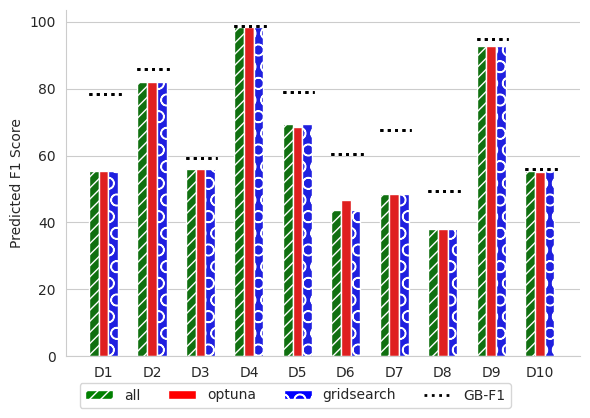

In [127]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = autoconf_final_results

metrics = ['PERFORMANCE', 'PREDICTED_F1', 'OPTIMIZATION_TIME', 'BEST_REGRESSOR_FIT_TIME']
# filtered_data = data[(data['EXPERIMENT'] == 'DL-SKLEARN') & 
#                      (data['REGRESSOR'] != 'SVR') &  
#                      (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]

filtered_data = data[(data['REGRESSOR'] == 'LinearRegression') &  
                     (data['WITH_DATA_FEATURES'] == 1) &  
                     (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]

test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], 
                                           categories=test_set_order, ordered=True)

fig, ax = plt.subplots(figsize=(6, 4))
metric = 'PREDICTED_F1'
temp_data = filtered_data.groupby(['TEST_SET', 'DATASET'])[metric].max().reset_index()


barplot = sns.barplot(ax=ax, data=temp_data, x='TEST_SET', y=metric, hue='DATASET',
                      hue_order=hue_order, width=0.6, order=test_set_order, palette=palette)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

if metric == 'PREDICTED_F1':
    max_values = filtered_data.groupby(['TEST_SET', 'DATASET'])['GLOBAL_BEST_F1'].max()
    
    for j, test_set in enumerate(test_set_order):
        max_value = max_values[test_set]
        line_position = j - 0.3
        ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.65, 
                  colors='black', linestyles=':', lw=2)

for bars, dataset in zip(barplot.containers, hue_order):
    hatch = hatches[dataset]
    for bar in bars:
        bar.set_hatch(hatch)

ax.set_ylabel('Predicted F1 Score')

ax.get_legend().remove()

legend_handles = [
    Patch(facecolor=palette[label], edgecolor='white', hatch=hatches[label]) 
    for label in legend_order[:-1]
]

dashed_line = Line2D([0], [0], color='black', linestyle=':', lw=2)
legend_handles.append(dashed_line)

fig.legend(legend_handles, legend_order, loc='lower center', 
           bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize=10)

plt.tight_layout()
plt.savefig('./figures/sklearn_and_nn_f1.png', bbox_inches='tight')
plt.show()


Best reults for each dataset using SKLEARN & NN approach.

In [128]:
idx = filtered_data.groupby('TEST_SET')['PREDICTED_F1'].idxmax()
max_f1_rows = filtered_data.loc[idx]

# max_f1_rows

best_table = max_f1_rows[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1','GLOBAL_BEST_F1','PERFORMANCE']]
columns_to_format = ['PREDICTED_F1', 'GLOBAL_BEST_F1','PERFORMANCE']

# Apply string formatting to keep two decimals
for column in columns_to_format:
    best_table[column] = best_table[column].map('{:.2f}'.format)
best_table.columns = [col.replace('_', ' ') for col in best_table.columns]

for column in best_table.columns:
    if best_table[column].dtype == object:  # Check if the column is of object type, typically used for strings in pandas
        best_table[column] = best_table[column].apply(lambda x: x.replace('_', ' '))
best_table['REGRESSOR'] = best_table['REGRESSOR'].str.replace('automl', '', case=False)

latex_table = best_table.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|', longtable=False)
print(latex_table)

\begin{tabular}{|c|c|c|c|c|c|}
\toprule
TEST SET & DATASET & REGRESSOR & PREDICTED F1 & GLOBAL BEST F1 & PERFORMANCE \\
\midrule
D1 & all & LinearRegression & 55.35 & 78.43 & 0.71 \\
D2 & all & LinearRegression & 81.94 & 85.85 & 0.95 \\
D3 & all & LinearRegression & 55.98 & 59.19 & 0.95 \\
D4 & all & LinearRegression & 98.38 & 98.60 & 1.00 \\
D5 & all & LinearRegression & 69.39 & 78.92 & 0.88 \\
D6 & optuna & LinearRegression & 46.65 & 60.42 & 0.77 \\
D7 & all & LinearRegression & 48.48 & 67.76 & 0.72 \\
D8 & all & LinearRegression & 38.09 & 49.53 & 0.77 \\
D9 & all & LinearRegression & 92.85 & 94.92 & 0.98 \\
D10 & gridsearch & LinearRegression & 55.40 & 56.12 & 0.99 \\
\bottomrule
\end{tabular}



In [129]:
filtered_data[filtered_data['TEST_SET'] == 'D4'].groupby(by=['DATASET', 'REGRESSOR'])['BEST_REGRESSOR_FIT_TIME'].mean()

DATASET     REGRESSOR       
all         LinearRegression    0.2086
gridsearch  LinearRegression    0.1298
optuna      LinearRegression    0.0790
Name: BEST_REGRESSOR_FIT_TIME, dtype: float64

In [130]:
filtered_data.groupby(by=['TEST_SET', 'REGRESSOR'])['PREDICTED_F1'].max()

TEST_SET  REGRESSOR       
D1        LinearRegression    55.3459
D2        LinearRegression    81.9401
D3        LinearRegression    55.9823
D4        LinearRegression    98.3769
D5        LinearRegression    69.3934
D6        LinearRegression    46.6491
D7        LinearRegression    48.4848
D8        LinearRegression    38.0861
D9        LinearRegression    92.8452
D10       LinearRegression    55.3994
Name: PREDICTED_F1, dtype: float64

### Linear regression results

In [131]:
print(filtered_data.columns.tolist())

['TEST_SET', 'DATASET', 'EXPERIMENT', 'REGRESSOR', 'VALIDATION_MSE', 'TEST_MSE', 'PREDICTED_F1', 'GLOBAL_BEST_F1', 'PERFORMANCE', 'OPTIMIZATION_TIME', 'BEST_REGRESSOR_FIT_TIME', 'BEST_REGRESSOR_PREDICTION_TIME', 'WITH_DATA_FEATURES', 'LM', 'K', 'CLUSTERING', 'THRESHOLD']


In [132]:
df=data
lr_with_data_features = df[(df['WITH_DATA_FEATURES'] == 1) & (data['REGRESSOR'] == 'LinearRegression')].copy()
print(lr_with_data_features.shape)
lr_without_data_features = df[(df['WITH_DATA_FEATURES'] == 0) & (data['REGRESSOR'] == 'LinearRegression')].copy()
print(lr_without_data_features.shape)

(30, 17)
(30, 17)


In [133]:
lr_with_data_features

,TEST_SET,DATASET,EXPERIMENT,REGRESSOR,VALIDATION_MSE,TEST_MSE,PREDICTED_F1,GLOBAL_BEST_F1,PERFORMANCE,OPTIMIZATION_TIME,BEST_REGRESSOR_FIT_TIME,BEST_REGRESSOR_PREDICTION_TIME,WITH_DATA_FEATURES,LM,K,CLUSTERING,THRESHOLD
60,D1,all,DL-SKLEARN,LinearRegression,247.1241,9.872974e+22,55.3459,78.4314,0.7057,0.4103,0.3260,0.0147,1,st5,1.0,KiralyMSMApproximateClustering,0.05
61,D2,all,DL-SKLEARN,LinearRegression,241.8828,6.654751e+22,81.9401,85.8486,0.9545,0.2646,0.2393,0.0027,1,st5,1.0,KiralyMSMApproximateClustering,0.05
62,D3,all,DL-SKLEARN,LinearRegression,270.4079,1.138067e+25,55.9823,59.1887,0.9458,0.2557,0.3289,0.0026,1,st5,1.0,KiralyMSMApproximateClustering,0.05
63,D4,all,DL-SKLEARN,LinearRegression,243.8159,2.130060e+24,98.3769,98.6011,0.9977,0.2380,0.2086,0.0022,1,st5,1.0,KiralyMSMApproximateClustering,0.05
64,D5,all,DL-SKLEARN,LinearRegression,252.0246,2.744490e+23,69.3934,78.9235,0.8792,0.2222,0.2088,0.0025,1,st5,1.0,KiralyMSMApproximateClustering,0.05
65,D6,all,DL-SKLEARN,LinearRegression,269.9015,5.433685e+23,43.8459,60.4225,0.7257,0.2473,0.2095,0.0023,1,st5,1.0,KiralyMSMApproximateClustering,0.05
66,D7,all,DL-SKLEARN,LinearRegression,254.9566,3.843765e+22,48.4848,67.7600,0.7155,0.2271,0.2079,0.0024,1,st5,1.0,KiralyMSMApproximateClustering,0.05
67,D8,all,DL-SKLEARN,LinearRegression,279.2682,6.014746e+22,38.0861,49.5337,0.7689,0.2728,0.2092,0.0021,1,st5,1.0,KiralyMSMApproximateClustering,0.05
68,D9,all,DL-SKLEARN,LinearRegression,228.6403,2.280802e+25,92.8452,94.9241,0.9781,0.2270,0.2081,0.0025,1,st5,1.0,KiralyMSMApproximateClustering,0.05
69,D10,all,DL-SKLEARN,LinearRegression,261.5896,2.589303e+07,55.3979,56.1170,0.9872,0.2224,0.2068,0.0021,1,st5,1.0,KiralyMSMApproximateClustering,0.05


In [134]:
lr_without_data_features

,TEST_SET,DATASET,EXPERIMENT,REGRESSOR,VALIDATION_MSE,TEST_MSE,PREDICTED_F1,GLOBAL_BEST_F1,PERFORMANCE,OPTIMIZATION_TIME,BEST_REGRESSOR_FIT_TIME,BEST_REGRESSOR_PREDICTION_TIME,WITH_DATA_FEATURES,LM,K,CLUSTERING,THRESHOLD
210,D1,optuna,DL-SKLEARN,LinearRegression,544.4438,547.9948,55.3459,78.4314,0.7057,0.0523,0.0223,0.0011,0,st5,1.0,KiralyMSMApproximateClustering,0.05
211,D2,optuna,DL-SKLEARN,LinearRegression,552.8827,419.6181,81.9401,85.8486,0.9545,0.0495,0.0216,0.0011,0,st5,1.0,KiralyMSMApproximateClustering,0.05
212,D3,optuna,DL-SKLEARN,LinearRegression,571.3870,245.9041,55.9823,59.1887,0.9458,0.1048,0.0218,0.0011,0,st5,1.0,KiralyMSMApproximateClustering,0.05
213,D4,optuna,DL-SKLEARN,LinearRegression,397.4193,1995.3180,98.1761,98.6011,0.9957,0.0476,0.0215,0.0012,0,st5,100.0,KiralyMSMApproximateClustering,0.05
214,D5,optuna,DL-SKLEARN,LinearRegression,569.5459,263.5872,69.3934,78.9235,0.8792,0.0472,0.0210,0.0011,0,st5,1.0,KiralyMSMApproximateClustering,0.05
215,D6,optuna,DL-SKLEARN,LinearRegression,551.2743,439.1771,43.8459,60.4225,0.7257,0.0493,0.0213,0.0011,0,st5,1.0,KiralyMSMApproximateClustering,0.05
216,D7,optuna,DL-SKLEARN,LinearRegression,566.5076,281.4961,48.4848,67.7600,0.7155,0.0467,0.0212,0.0011,0,st5,1.0,KiralyMSMApproximateClustering,0.05
217,D8,optuna,DL-SKLEARN,LinearRegression,531.8614,652.0668,38.0861,49.5337,0.7689,0.0460,0.0211,0.0011,0,st5,1.0,KiralyMSMApproximateClustering,0.05
218,D9,optuna,DL-SKLEARN,LinearRegression,504.4922,897.8795,92.8452,94.9241,0.9781,0.0502,0.0210,0.0011,0,st5,1.0,KiralyMSMApproximateClustering,0.05
219,D10,optuna,DL-SKLEARN,LinearRegression,518.4466,743.4674,55.3979,56.1170,0.9872,0.0466,0.0211,0.0011,0,st5,1.0,KiralyMSMApproximateClustering,0.05


In [135]:
lr_results = pd.merge(lr_with_data_features, lr_without_data_features, on=['TEST_SET', 'DATASET', 'EXPERIMENT', 'REGRESSOR'], how='left', suffixes=('_WITH_DATA_FEATURES', '_WITHOUT_DATA_FEATURES'))

print(lr_results.shape)
print(lr_results.columns.tolist())

# lr_results[['TEST_SET', 'DATASET', 'EXPERIMENT', 'REGRESSOR', 'PREDICTED_F1_WITH_DATA_FEATURES', 'PREDICTED_F1_WITHOUT_DATA_FEATURES']].where(lr_results['PREDICTED_F1_WITH_DATA_FEATURES'] != lr_results['PREDICTED_F1_WITHOUT_DATA_FEATURES']).dropna()



(30, 30)
['TEST_SET', 'DATASET', 'EXPERIMENT', 'REGRESSOR', 'VALIDATION_MSE_WITH_DATA_FEATURES', 'TEST_MSE_WITH_DATA_FEATURES', 'PREDICTED_F1_WITH_DATA_FEATURES', 'GLOBAL_BEST_F1_WITH_DATA_FEATURES', 'PERFORMANCE_WITH_DATA_FEATURES', 'OPTIMIZATION_TIME_WITH_DATA_FEATURES', 'BEST_REGRESSOR_FIT_TIME_WITH_DATA_FEATURES', 'BEST_REGRESSOR_PREDICTION_TIME_WITH_DATA_FEATURES', 'WITH_DATA_FEATURES_WITH_DATA_FEATURES', 'LM_WITH_DATA_FEATURES', 'K_WITH_DATA_FEATURES', 'CLUSTERING_WITH_DATA_FEATURES', 'THRESHOLD_WITH_DATA_FEATURES', 'VALIDATION_MSE_WITHOUT_DATA_FEATURES', 'TEST_MSE_WITHOUT_DATA_FEATURES', 'PREDICTED_F1_WITHOUT_DATA_FEATURES', 'GLOBAL_BEST_F1_WITHOUT_DATA_FEATURES', 'PERFORMANCE_WITHOUT_DATA_FEATURES', 'OPTIMIZATION_TIME_WITHOUT_DATA_FEATURES', 'BEST_REGRESSOR_FIT_TIME_WITHOUT_DATA_FEATURES', 'BEST_REGRESSOR_PREDICTION_TIME_WITHOUT_DATA_FEATURES', 'WITH_DATA_FEATURES_WITHOUT_DATA_FEATURES', 'LM_WITHOUT_DATA_FEATURES', 'K_WITHOUT_DATA_FEATURES', 'CLUSTERING_WITHOUT_DATA_FEATURES', 

In [136]:
import warnings
warnings.filterwarnings("ignore")

idx = lr_without_data_features.groupby('TEST_SET')['PREDICTED_F1'].idxmax()
max_f1_rows = lr_without_data_features.loc[idx]


best_table = max_f1_rows[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1', 'GLOBAL_BEST_F1', 'PERFORMANCE', 'BEST_REGRESSOR_FIT_TIME', 'BEST_REGRESSOR_PREDICTION_TIME', 'LM', 'K', 'CLUSTERING', 'THRESHOLD']]

best_table['ETEER Runtime (s)'] = best_table['BEST_REGRESSOR_PREDICTION_TIME'] + best_table['BEST_REGRESSOR_FIT_TIME']

# best_table['BEST_REGRESSOR_FIT_TIME'] = best_table['BEST_REGRESSOR_FIT_TIME']/3600
# best_table['ETEER Runtime (s)'] = best_table['ETEER Runtime (s)']/3600

# round all times in 2 decimals

best_table['BEST_REGRESSOR_FIT_TIME'] = best_table['BEST_REGRESSOR_FIT_TIME'].round(2)
# best_table['BEST_REGRESSOR_FIT_TIME'] = best_table['BEST_REGRESSOR_FIT_TIME'].astype(int)
best_table['BEST_REGRESSOR_PREDICTION_TIME'] = best_table['BEST_REGRESSOR_PREDICTION_TIME'].round(2)
# best_table['BEST_REGRESSOR_PREDICTION_TIME'] = best_table['BEST_REGRESSOR_PREDICTION_TIME'].astype(int)


best_table['PREDICTED_F1'] = best_table['PREDICTED_F1'].round(2)
best_table['PERFORMANCE'] = best_table['PERFORMANCE'].round(2)
best_table['GLOBAL_BEST_F1'] = best_table['GLOBAL_BEST_F1'].round(2)


best_table = best_table[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1', 'GLOBAL_BEST_F1', 'PERFORMANCE', 'BEST_REGRESSOR_FIT_TIME', 'BEST_REGRESSOR_PREDICTION_TIME', 'ETEER Runtime (s)', 'LM', 'K', 'CLUSTERING', 'THRESHOLD']]

best_table.rename(columns={
    'TEST_SET': 'Test set',
    'DATASET': 'Trials training set',
    'REGRESSOR': 'Regressor',
    'PREDICTED_F1': 'F1',
    'GLOBAL_BEST_F1': 'GB-F1',
    'PERFORMANCE': 'F1-Ratio',
    'BEST_REGRESSOR_FIT_TIME': 'Training time (s)',
    'BEST_REGRESSOR_PREDICTION_TIME': 'Prediction time (s)',
    'LM': 'LM',
    'K': 'k',
    'CLUSTERING': 'Clustering',
    'THRESHOLD': 'Threshold'
}, inplace=True)

# change order

latex_table = best_table.to_latex(index=False, header=True, column_format='|'+13*'c|', longtable=False)
print(latex_table)



\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\toprule
Test set & Trials training set & Regressor & F1 & GB-F1 & F1-Ratio & Training time (s) & Prediction time (s) & ETEER Runtime (s) & LM & k & Clustering & Threshold \\
\midrule
D1 & optuna & LinearRegression & 55.350000 & 78.430000 & 0.710000 & 0.020000 & 0.000000 & 0.023400 & st5 & 1.000000 & KiralyMSMApproximateClustering & 0.050000 \\
D10 & gridsearch & LinearRegression & 55.400000 & 56.120000 & 0.990000 & 0.040000 & 0.000000 & 0.043700 & st5 & 1.000000 & KiralyMSMApproximateClustering & 0.050000 \\
D2 & optuna & LinearRegression & 81.940000 & 85.850000 & 0.950000 & 0.020000 & 0.000000 & 0.022700 & st5 & 1.000000 & KiralyMSMApproximateClustering & 0.050000 \\
D3 & optuna & LinearRegression & 55.980000 & 59.190000 & 0.950000 & 0.020000 & 0.000000 & 0.022900 & st5 & 1.000000 & KiralyMSMApproximateClustering & 0.050000 \\
D4 & all & LinearRegression & 98.380000 & 98.600000 & 1.000000 & 0.080000 & 0.000000 & 0.078300 & st5 & 1.000000 &

### **Concatenated** comparison

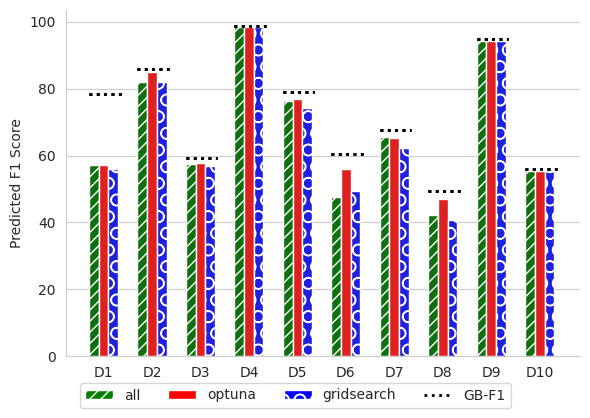

In [137]:
data = autoconf_final_results

filtered_data = data[(data['REGRESSOR'] != 'SVR') & (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], 
                                           categories=test_set_order, ordered=True)

fig, ax = plt.subplots(figsize=(6, 4))

metric = 'PREDICTED_F1'
temp_data = filtered_data.groupby(['TEST_SET', 'DATASET'])[metric].max().reset_index()

barplot = sns.barplot(ax=ax, data=temp_data, x='TEST_SET', y=metric, hue='DATASET',
                      hue_order=hue_order, width=0.6, order=test_set_order, palette=palette)

ax.set_xlabel('')
ax.tick_params(axis='x')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

if metric == 'PREDICTED_F1':
    max_values = filtered_data.groupby(['TEST_SET', 'DATASET'])['GLOBAL_BEST_F1'].max()
    
    for j, test_set in enumerate(test_set_order):
        max_value = max_values[test_set]
        line_position = j - 0.3
        ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.65, 
                  colors='black', linestyles=':', lw=2)

for bars, dataset in zip(barplot.containers, hue_order):
    hatch = hatches[dataset]
    for bar in bars:
        bar.set_hatch(hatch)

ax.set_ylabel('Predicted F1 Score')

ax.get_legend().remove()

custom_handles = [
    Patch(facecolor=palette[label], edgecolor='white', hatch=hatches[label]) 
    for label in legend_order[:-1]
]

dashed_line = Line2D([0], [0], color='black', linestyle=':', lw=2)
custom_handles.append(dashed_line)

fig.legend(custom_handles, legend_order, loc='lower center', 
           bbox_to_anchor=(0.5, -0.05), ncol=4)

plt.tight_layout()
plt.savefig('./figures/all_f1.png', bbox_inches='tight')
plt.show()


In [138]:
idx = filtered_data.groupby('TEST_SET')['PREDICTED_F1'].idxmax()
max_f1_rows = filtered_data.loc[idx]
max_f1_rows

,TEST_SET,DATASET,EXPERIMENT,REGRESSOR,VALIDATION_MSE,TEST_MSE,PREDICTED_F1,GLOBAL_BEST_F1,PERFORMANCE,OPTIMIZATION_TIME,BEST_REGRESSOR_FIT_TIME,BEST_REGRESSOR_PREDICTION_TIME,WITH_DATA_FEATURES,LM,K,CLUSTERING,THRESHOLD
10,D1,all,AutoML,0.54*gradient_boosting + 0.36*random_forest + ...,NaN,3.194926e+02,57.1429,78.4314,0.7286,43218.6062,NaN,61.9368,0,st5,1.0,KiralyMSMApproximateClustering,0.7790
141,D2,optuna,DL-SKLEARN,XGBRegressor,0.0209,9.716385e+02,84.9483,85.8486,0.9895,89926.4789,1302.4323,0.1420,1,NaN,NaN,NaN,NaN
23,D3,optuna,AutoML,0.54*extra_trees + 0.16*extra_trees + 0.14*ran...,NaN,2.230337e+02,57.7941,59.1887,0.9764,43237.3137,NaN,218.3301,1,st5,32.0,UniqueMappingClustering,0.0500
4,D4,all,AutoML,0.96*random_forest + 0.04*gradient_boosting,NaN,3.249507e+03,98.4510,98.6011,0.9985,43447.5507,NaN,28.3302,1,st5,1.0,ConnectedComponentsClustering,0.8742
204,D5,optuna,DL-SKLEARN,RandomForestRegressor,84.7220,3.691141e+02,76.9588,78.9235,0.9751,2395.7917,91.5009,0.8181,1,NaN,NaN,NaN,NaN
26,D6,optuna,AutoML,0.4*extra_trees + 0.18*random_forest + 0.18*gr...,NaN,3.092738e+02,55.9806,60.4225,0.9265,43225.9136,NaN,252.5683,1,sminilm,1.0,KiralyMSMApproximateClustering,0.6307
17,D7,all,AutoML,0.58*gradient_boosting + 0.36*random_forest + ...,NaN,2.661762e+02,65.4746,67.7600,0.9663,43204.3003,NaN,67.9615,0,sminilm,1.0,UniqueMappingClustering,0.6694
38,D8,optuna,AutoML,0.9*extra_trees + 0.02*gradient_boosting + 0.0...,NaN,7.916615e+02,47.0485,49.5337,0.9498,43213.0313,NaN,62.4086,0,st5,1.0,UniqueMappingClustering,0.8960
9,D9,all,AutoML,0.94*random_forest + 0.06*gradient_boosting,NaN,2.076766e+03,94.3887,94.9241,0.9944,43430.4042,NaN,40.3751,1,st5,92.0,KiralyMSMApproximateClustering,0.7000
109,D10,gridsearch,DL-SKLEARN,Lasso,263.6850,4.119249e+07,55.3994,56.1170,0.9872,104314.2585,2079.0167,0.0315,1,NaN,NaN,NaN,NaN


In [139]:
best_table = max_f1_rows[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1','GLOBAL_BEST_F1','PERFORMANCE']]
columns_to_format = ['PREDICTED_F1','GLOBAL_BEST_F1','PERFORMANCE']

# Apply string formatting to keep two decimals
for column in columns_to_format:
    best_table[column] = best_table[column].map('{:.2f}'.format)
best_table.columns = [col.replace('_', ' ') for col in best_table.columns]

for column in best_table.columns:
    if best_table[column].dtype == object:  # Check if the column is of object type, typically used for strings in pandas
        best_table[column] = best_table[column].apply(lambda x: x.replace('_', ' '))
best_table['REGRESSOR'] = best_table['REGRESSOR'].str.replace('automl', '', case=False)

latex_table = best_table.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|', longtable=False)
print(latex_table)

\begin{tabular}{|c|c|c|c|c|c|}
\toprule
TEST SET & DATASET & REGRESSOR & PREDICTED F1 & GLOBAL BEST F1 & PERFORMANCE \\
\midrule
D1 & all & 0.54*gradient boosting + 0.36*random forest + 0.1*gradient boosting & 57.14 & 78.43 & 0.73 \\
D2 & optuna & XGBRegressor & 84.95 & 85.85 & 0.99 \\
D3 & optuna & 0.54*extra trees + 0.16*extra trees + 0.14*random forest + 0.12*gradient boosting + 0.04*k nearest neighbors & 57.79 & 59.19 & 0.98 \\
D4 & all & 0.96*random forest + 0.04*gradient boosting & 98.45 & 98.60 & 1.00 \\
D5 & optuna & RandomForestRegressor & 76.96 & 78.92 & 0.98 \\
D6 & optuna & 0.4*extra trees + 0.18*random forest + 0.18*gradient boosting + 0.12*gradient boosting + 0.12*k nearest neighbors & 55.98 & 60.42 & 0.93 \\
D7 & all & 0.58*gradient boosting + 0.36*random forest + 0.06*gradient boosting & 65.47 & 67.76 & 0.97 \\
D8 & optuna & 0.9*extra trees + 0.02*gradient boosting + 0.02*adaboost + 0.02*k nearest neighbors + 0.02*random forest + 0.02*random forest & 47.05 & 49.53 & 0.9

## Runtimes

In [140]:
autoconf_final_results

,TEST_SET,DATASET,EXPERIMENT,REGRESSOR,VALIDATION_MSE,TEST_MSE,PREDICTED_F1,GLOBAL_BEST_F1,PERFORMANCE,OPTIMIZATION_TIME,BEST_REGRESSOR_FIT_TIME,BEST_REGRESSOR_PREDICTION_TIME,WITH_DATA_FEATURES,LM,K,CLUSTERING,THRESHOLD
0,D1,all,AutoML,0.88*random_forest + 0.08*gradient_boosting + ...,NaN,538.5980,54.8287,78.4314,0.6991,43440.6720,NaN,13.4146,1,st5,11.0,UniqueMappingClustering,0.7500
1,D10,all,AutoML,0.88*random_forest + 0.06*gradient_boosting + ...,NaN,2288.8816,17.2346,56.1170,0.3071,43430.0451,NaN,503.7444,1,st5,84.0,KiralyMSMApproximateClustering,0.8071
2,D2,all,AutoML,0.841*random_forest + 0.082*gradient_boosting ...,NaN,1568.3941,81.5544,85.8486,0.9500,43453.5410,NaN,476.2028,1,st5,1.0,UniqueMappingClustering,0.7530
3,D3,all,AutoML,0.88*random_forest + 0.08*gradient_boosting + ...,NaN,23.5243,56.9019,59.1887,0.9614,43452.0678,NaN,37.8720,1,sminilm,3.0,UniqueMappingClustering,0.6000
4,D4,all,AutoML,0.96*random_forest + 0.04*gradient_boosting,NaN,3249.5067,98.4510,98.6011,0.9985,43447.5507,NaN,28.3302,1,st5,1.0,ConnectedComponentsClustering,0.8742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,D6,gridsearch,DL-SKLEARN,LinearRegression,586.1393,433.3739,43.8459,60.4225,0.7257,0.0826,0.0428,0.0012,0,st5,1.0,KiralyMSMApproximateClustering,0.0500
236,D7,gridsearch,DL-SKLEARN,LinearRegression,601.8142,282.4391,48.4848,67.7600,0.7155,0.0747,0.0427,0.0013,0,st5,1.0,KiralyMSMApproximateClustering,0.0500
237,D8,gridsearch,DL-SKLEARN,LinearRegression,584.1296,444.5389,38.0861,49.5337,0.7689,0.0931,0.0551,0.0014,0,st5,1.0,KiralyMSMApproximateClustering,0.0500
238,D9,gridsearch,DL-SKLEARN,LinearRegression,523.6430,1045.9317,92.8452,94.9241,0.9781,0.0880,0.0579,0.0013,0,st5,1.0,KiralyMSMApproximateClustering,0.0500


### AutoML

In [141]:
automl_runtimes_df = autoconf_final_results[(autoconf_final_results['EXPERIMENT'] == 'AutoML') & (autoconf_final_results['DATASET'].isin(['gridsearch', 'optuna', 'all']))]

In [142]:
optimization_time_res = automl_runtimes_df.groupby(['TEST_SET', 'DATASET', 'REGRESSOR'])['OPTIMIZATION_TIME'].mean().reset_index()
prediction_time_res = automl_runtimes_df.groupby(['TEST_SET', 'DATASET', 'REGRESSOR'])['BEST_REGRESSOR_PREDICTION_TIME'].mean().reset_index()
automl_merged_res = pd.merge(optimization_time_res, prediction_time_res, on=['TEST_SET', 'DATASET', 'REGRESSOR'])
automl_merged_res.to_csv(TABLES_DIR+'/automl_runtimes.csv', index=False)
automl_merged_res


,TEST_SET,DATASET,REGRESSOR,OPTIMIZATION_TIME,BEST_REGRESSOR_PREDICTION_TIME
0,D1,all,0.54*gradient_boosting + 0.36*random_forest + ...,43218.6062,61.9368
1,D1,all,0.88*random_forest + 0.08*gradient_boosting + ...,43440.6720,13.4146
2,D1,gridsearch,0.52*random_forest + 0.22*decision_tree + 0.16...,43228.7849,7.0127
3,D1,gridsearch,0.62*gradient_boosting + 0.38*random_forest,43279.9262,47.1224
4,D1,optuna,0.38*extra_trees + 0.36*random_forest + 0.14*g...,43238.9560,239.6281
5,D1,optuna,0.74*extra_trees + 0.18*random_forest + 0.04*k...,43201.3939,55.9394
6,D10,all,0.6*gradient_boosting + 0.36*random_forest + 0...,43200.3256,50.2222
7,D10,all,0.88*random_forest + 0.06*gradient_boosting + ...,43430.0451,503.7444
8,D10,gridsearch,0.68*random_forest + 0.22*adaboost + 0.08*libl...,43219.2980,5.5964
9,D10,gridsearch,0.76*gradient_boosting + 0.24*random_forest,43338.3617,10.9145


### Individual Regressors

In [143]:
ind_regressors_runtimes_df = autoconf_final_results[(autoconf_final_results['EXPERIMENT'] == 'DL-SKLEARN') & (autoconf_final_results['DATASET'].isin(['gridsearch', 'optuna', 'all']))]

In [144]:
optimization_time_res = ind_regressors_runtimes_df.groupby(['TEST_SET', 'DATASET', 'REGRESSOR'])['OPTIMIZATION_TIME'].mean().reset_index()
prediction_time_res = ind_regressors_runtimes_df.groupby(['TEST_SET', 'DATASET', 'REGRESSOR'])['BEST_REGRESSOR_PREDICTION_TIME'].mean().reset_index()
fit_time_res = ind_regressors_runtimes_df.groupby(['TEST_SET', 'DATASET', 'REGRESSOR'])['BEST_REGRESSOR_FIT_TIME'].mean().reset_index()
individual_regressors_merged_res = pd.merge(optimization_time_res, prediction_time_res, on=['TEST_SET', 'DATASET', 'REGRESSOR'])
individual_regressors_merged_res = pd.merge(individual_regressors_merged_res, fit_time_res, on=['TEST_SET', 'DATASET', 'REGRESSOR'])

individual_regressors_merged_res.to_csv(TABLES_DIR+'individual_regressors_runtimes.csv', index=False)
individual_regressors_merged_res

,TEST_SET,DATASET,REGRESSOR,OPTIMIZATION_TIME,BEST_REGRESSOR_PREDICTION_TIME,BEST_REGRESSOR_FIT_TIME
0,D1,all,Lasso,70834.71070,0.0275,1570.2286
1,D1,all,LinearRegression,0.25470,0.0081,0.2016
2,D1,all,RandomForestRegressor,4551.72620,0.8489,77.5193
3,D1,all,Ridge,11.68410,0.0331,0.0610
4,D1,all,XGBRegressor,108958.67200,0.5034,3255.6326
...,...,...,...,...,...,...
145,D9,optuna,Lasso,110471.55480,0.0011,2535.9923
146,D9,optuna,LinearRegression,0.07135,0.0052,0.0589
147,D9,optuna,RandomForestRegressor,2681.61490,0.6862,75.1076
148,D9,optuna,Ridge,7.19160,0.0011,0.1464


In [145]:
individual_regressors_merged_res.columns.tolist()

['TEST_SET',
 'DATASET',
 'REGRESSOR',
 'OPTIMIZATION_TIME',
 'BEST_REGRESSOR_PREDICTION_TIME',
 'BEST_REGRESSOR_FIT_TIME']

In [146]:
# print me average runtimes for each regressor
avg_run_stats = individual_regressors_merged_res[['REGRESSOR',
 'OPTIMIZATION_TIME',
 'BEST_REGRESSOR_PREDICTION_TIME',
 'BEST_REGRESSOR_FIT_TIME']].groupby(by='REGRESSOR').max().reset_index()

avg_run_stats['OPTIMIZATION_TIME'] = avg_run_stats['OPTIMIZATION_TIME']/3600
# avg_run_stats['BEST_REGRESSOR_PREDICTION_TIME'] = avg_run_stats['BEST_REGRESSOR_PREDICTION_TIME']/3600
avg_run_stats['BEST_REGRESSOR_FIT_TIME'] = avg_run_stats['BEST_REGRESSOR_FIT_TIME']/3600

avg_run_stats

,REGRESSOR,OPTIMIZATION_TIME,BEST_REGRESSOR_PREDICTION_TIME,BEST_REGRESSOR_FIT_TIME
0,Lasso,32.648677,0.0699,0.741202
1,LinearRegression,0.000071,0.0081,0.000056
2,RandomForestRegressor,2.156525,2.5271,0.063541
3,Ridge,0.004192,0.0833,0.000080
4,XGBRegressor,31.630058,0.5034,1.102820


## Feature importance

In [149]:
# automl_features_importance_path = './without_gt/automl/automl_feature_importance.csv'
# sklearn_features_importance_path = './without_gt/sklearn/sklearn_feature_importance.csv'

In [150]:
# automl_features_df = pd.read_csv(automl_features_importance_path)
# sklearn_features_df = pd.read_csv(sklearn_features_importance_path)

# # Display the first few rows of each DataFrame to understand the structure
# print(automl_features_df.head())
# print(sklearn_features_df.head())

In [151]:
# automl_features_df[automl_features_df['FEATURE'] == 'AverageValueTokens']['IMPORTANCE'] > 0

In [152]:
# dataset_features = ['MaxValuesPerEntity',
#        'InputEntityProfiles', 'NumberOfAttributes',
#        'AverageDistinctValuesPerEntity', 'NumberOfDistinctValues',
#        'AverageNVPairsPerEntity', 'NumberOfNameValuePairs',
#        'AverageValueLength', 'NumberOfMissingNVpairs',
#        'AverageDistinctValuesPerAttribute', 'AverageNVpairsPerAttribute',
#        'AverageValueTokens']

In [153]:
# automl_features_df[automl_features_df['FEATURE'].isin(dataset_features) & (automl_features_df['IMPORTANCE'] != 0)]

In [154]:
# sklearn_features_df[sklearn_features_df['FEATURE'].isin(dataset_features) & (sklearn_features_df['IMPORTANCE'] != 0)]

In [155]:
# top_features_automl = automl_features_df.groupby('FEATURE')['IMPORTANCE'].mean().reset_index()
# top_features_automl['IMPORTANCE'] = top_features_automl['IMPORTANCE'].abs()
# top_features_automl = top_features_automl.sort_values(by='IMPORTANCE', ascending=False)

# top_features_sklearn = sklearn_features_df.groupby('FEATURE')['IMPORTANCE'].mean().reset_index()
# top_features_sklearn = top_features_sklearn.sort_values(by='IMPORTANCE', ascending=False)

In [156]:
# print("Top features according to AutoML:")
# print(top_features_automl)

In [157]:
# top_features_sklearn['FEATURE'] = top_features_sklearn['FEATURE'].replace(
#     to_replace=r'^lm_.*', value='lm', regex=True)
# top_features_sklearn['FEATURE'] = top_features_sklearn['FEATURE'].replace(
#     to_replace=r'^clustering_.*', value='clustering', regex=True)
# merged_top_features_sklearn = top_features_sklearn.groupby('FEATURE', as_index=False).sum()

# merged_top_features_sklearn = merged_top_features_sklearn.sort_values(by='IMPORTANCE', ascending=False)
# merged_top_features_sklearn

In [158]:
# top_features_automl['FEATURE'] = top_features_automl['FEATURE'].replace(
#     to_replace=r'^lm_.*', value='lm', regex=True)
# top_features_automl['FEATURE'] = top_features_automl['FEATURE'].replace(
#     to_replace=r'^clustering_.*', value='clustering', regex=True)
# merged_top_features_automl = top_features_automl.groupby('FEATURE', as_index=False).sum()

# merged_top_features_automl = merged_top_features_automl.sort_values(by='IMPORTANCE', ascending=False)
# merged_top_features_automl

In [159]:
# def plot_feature_importance(df, title):
#     plt.figure(figsize=(10, 6))
#     bars = plt.barh(df['FEATURE'], df['IMPORTANCE'], color='blue',  hatch='....')
#     plt.xlabel('Importance')
#     # plt.xscale('log')
#     # plt.title('Top Features by Importance ('+title+')')
#     plt.gca().invert_yaxis()

#     for bar, feature in zip(bars, df['FEATURE']):
#         plt.text(bar.get_width() + 0.001, 
#                     bar.get_y() + bar.get_height()/2, 
#                     feature, va='center', ha='left', color='black', fontsize=12)

#     plt.gca().get_yaxis().set_visible(False)
#     plt.tight_layout()
#     plt.savefig(f'./figures/feature_importance_{title}.png', bbox_inches='tight')
#     plt.show()

In [160]:
# plot_feature_importance(merged_top_features_automl, 'AutoML')

In [161]:
# plot_feature_importance(merged_top_features_sklearn, 'DL-SKLEARN')

In [162]:
# print("Top features according to sklearn:")
# top_features_sklearn

Per dataset

In [163]:
# top_features_per_dataset_automl = automl_features_df.groupby(['DATASET', 'FEATURE'])['IMPORTANCE'].mean().reset_index()
# top_features_per_dataset_automl = top_features_per_dataset_automl.sort_values(['DATASET', 'IMPORTANCE'], ascending=[True, False])

# print("Top features per dataset in AutoML:")
# top_features_per_dataset_automl.groupby('DATASET').head(5)

In [164]:
# top_features_per_dataset_sklearn = sklearn_features_df.groupby(['DATASET', 'FEATURE'])['IMPORTANCE'].mean().reset_index()
# top_features_per_dataset_sklearn = top_features_per_dataset_sklearn.sort_values(['DATASET', 'IMPORTANCE'], ascending=[True, False])

# print("Top features per dataset in sklearn:")
# top_features_per_dataset_sklearn.groupby('DATASET').head(5)

# **Benchmarking:** DBPEDIA data

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

dbpedia_results = './benchmarking/results/real_f1s/'
pattern = r'd1d10_dbpedia_(.*?)\.csv'

dbpedia_dfs = []
for f in os.listdir(dbpedia_results):
    if f.endswith('.csv'):
        df = pd.read_csv(dbpedia_results + f)
        type_d = re.search(pattern, f)
        dbpedia_dfs.append((type_d.group(1),df))
dbpedia_conc_results = pd.concat([x[1] for x in dbpedia_dfs], ignore_index=True)
dbpedia_conc_results['training_instances_type'] = [x[0] for x in dbpedia_dfs]

dbpedia_conc_results

,dataset,lm,k,clustering,threshold,training_time,prediction_time,predicted_f1,real_f1,real_precision,real_recall,pyjedai_runtime,training_instances_type
0,dbpedia,smpnet,85.0,KiralyMSMApproximateClustering,0.55,43205.552364,17.2191,71.9465,74.26,78.48,70.47,135167.1113,gridsearch
1,dbpedia,st5,18.0,KiralyMSMApproximateClustering,0.05,43217.588896,13.0725,76.1322,84.84,83.59,86.12,170741.4530,all
2,dbpedia,st5,1.0,KiralyMSMApproximateClustering,0.05,43200.689689,15.5378,58.4471,84.84,83.31,86.43,170774.0874,optuna


In [82]:
dbpedia_conc_results.to_csv(TABLES_DIR + 'dbpedia_results.csv', index=False)

In [83]:
print(len(dbpedia_conc_results.columns.tolist()))

13


In [92]:
dbpedia_results_to_latex = dbpedia_conc_results[['lm', 'k', 'clustering', 'threshold', 'training_time', 'prediction_time', 'predicted_f1', 'real_f1', 'real_precision', 'real_recall', 'pyjedai_runtime', 'training_instances_type']]

dbpedia_results_to_latex['training_time'] = dbpedia_results_to_latex['training_time']/3600
dbpedia_results_to_latex['training_time'] = dbpedia_results_to_latex['training_time'].round(2)
dbpedia_results_to_latex['prediction_time'] = dbpedia_results_to_latex['prediction_time'].round(2)
dbpedia_results_to_latex['pyjedai_runtime'] = dbpedia_results_to_latex['pyjedai_runtime']/3600
dbpedia_results_to_latex['pyjedai_runtime'] = dbpedia_results_to_latex['pyjedai_runtime'].round(2)

dbpedia_results_to_latex.columns = ['LM', 'K', 'Clustering', 'Threshold', 'Training Time (h)', 'Prediction Time (s)', 'Predicted F1', 'Real F1', 'Real Precision', 'Real Recall', 'PyJedAI Runtime (h)', 'Training Instances Type']
latex_output = dbpedia_results_to_latex.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|c|c|c|c|c|c|c|', longtable=False)
print(latex_output)

\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\toprule
LM & K & Clustering & Threshold & Training Time (h) & Prediction Time (s) & Predicted F1 & Real F1 & Real Precision & Real Recall & PyJedAI Runtime (h) & Training Instances Type \\
\midrule
smpnet & 85.000000 & KiralyMSMApproximateClustering & 0.550000 & 12.001542 & 17.219100 & 71.946500 & 74.260000 & 78.480000 & 70.470000 & 37.546420 & gridsearch \\
st5 & 18.000000 & KiralyMSMApproximateClustering & 0.050000 & 12.004886 & 13.072500 & 76.132200 & 84.840000 & 83.590000 & 86.120000 & 47.428181 & all \\
st5 & 1.000000 & KiralyMSMApproximateClustering & 0.050000 & 12.000192 & 15.537800 & 58.447100 & 84.840000 & 83.310000 & 86.430000 & 47.437247 & optuna \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1373037/886804015.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1373037/886804015.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1373037/886804015.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **Baseline:** ZeroER

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

zeroer_results = pd.read_csv('./sheets/ZeroER.csv')
print(zeroer_results)
zeroer_results['runtime (s)'] = zeroer_results['runtime (s)'].round(0)

zeroer_results['f1'] = zeroer_results['f1']*100
zeroer_results['f1'] = zeroer_results['f1'].round(2)



zeroer_results.rename(columns={'runtime (s)': 'Runtime (sec)', 'dataset': 'Dataset', 'f1':'F1 (\%)'}, inplace=True)

# keep only 2 decimals 
zeroer_results['F1 (\%)'] = zeroer_results['F1 (\%)'].round(2)

latex_output = zeroer_results.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|c|c|', longtable=False)

print(latex_output)

  dataset   runtime (s)        f1
0      D1      3.828759  0.000000
1      D2   4169.030765  0.464561
2      D4  20022.899320  0.969996
3      D5   2039.209009  0.927911
4      D7   4012.717816  0.880734
5      D9  87846.422920  0.640629
6     D10   1581.930722  0.926165
\begin{tabular}{|c|c|c|c|c|c|c|c|}
\toprule
Dataset & Runtime (sec) & F1 (\%) \\
\midrule
D1 & 4.000000 & 0.000000 \\
D2 & 4169.000000 & 46.460000 \\
D4 & 20023.000000 & 97.000000 \\
D5 & 2039.000000 & 92.790000 \\
D7 & 4013.000000 & 88.070000 \\
D9 & 87846.000000 & 64.060000 \\
D10 & 1582.000000 & 92.620000 \\
\bottomrule
\end{tabular}

